In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pymongo import MongoClient
from house_price_geo_analysis import calc_manhattan_dist, add_distance_columns, analyze_dist_col, plot_dist_analysis
from locations_coords import LOCATIONS
from conv_calculation import conv_factor_kc
from datetime import datetime

In [2]:
df_houseprice = pd.read_csv(r"C:\Users\Wiktoria\Desktop\Python Basics\Projekt\Regresja liniowa\kc_house_data.csv")

In [3]:
pd.set_option('display.max_columns', None)
df_houseprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21610 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21610 non-null  float64
 5   sqft_living    21612 non-null  float64
 6   sqft_lot       21610 non-null  float64
 7   floors         21612 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21609 non-null  float64
 13  sqft_basement  21610 non-null  float64
 14  yr_built       21612 non-null  float64
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
df_houseprice.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161000e+04,21613.000000,21610.000000,21612.000000,2.161000e+04,21612.000000,21613.000000,21613.000000,21613.000000,21613.000000,21609.000000,21610.000000,21612.000000,21613.000000,21613.000000,21613.000000,21613.000000,21610.000000,21611.000000
mean,4.580302e+09,5.401135e+05,3.370842,2.114762,2079.870581,1.510840e+04,1.494286,0.007542,0.234303,3.409430,7.656873,1788.267296,291.441694,1971.005367,84.402258,98077.939805,47.560053,-122.213896,1986.489542,12768.639813
std,2.876566e+09,3.671457e+05,0.930062,0.770163,918.452144,4.142320e+04,0.539990,0.086517,0.766318,0.650743,1.175459,828.020670,442.557963,29.374071,401.679240,53.505026,0.138564,0.140828,685.301490,27305.296495
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219625e+05,3.000000,1.750000,1426.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068875e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
df_houseprice.isna().any()

id               False
date             False
price             True
bedrooms         False
bathrooms         True
sqft_living       True
sqft_lot          True
floors            True
waterfront       False
view             False
condition        False
grade            False
sqft_above        True
sqft_basement     True
yr_built          True
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15     True
sqft_lot15        True
dtype: bool

In [6]:
df_houseprice.isna().sum()

id               0
date             0
price            3
bedrooms         0
bathrooms        3
sqft_living      1
sqft_lot         3
floors           1
waterfront       0
view             0
condition        0
grade            0
sqft_above       4
sqft_basement    3
yr_built         1
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    3
sqft_lot15       2
dtype: int64

In [7]:
df_houseprice.drop(columns='id', inplace=True)

<Axes: >

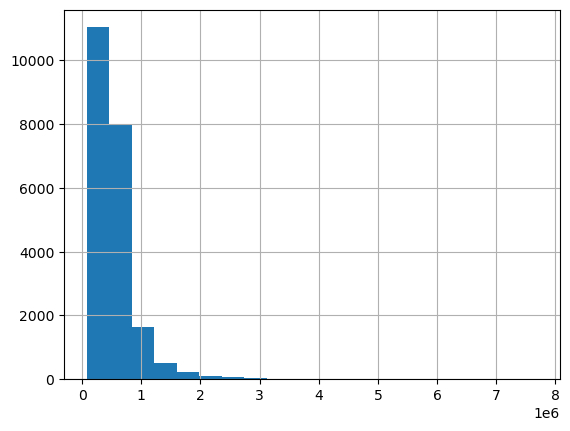

In [8]:
#Filling in missing data
#PRICE
plt.figure()
df_houseprice['price'].hist(bins=20)

In [9]:
df_houseprice['price'] = df_houseprice['price'].fillna(df_houseprice['price'].median())

<Axes: >

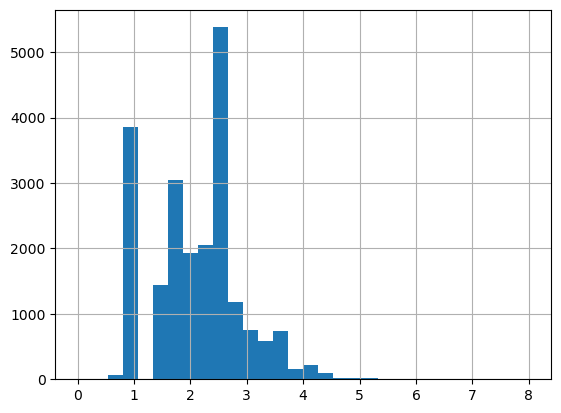

In [10]:
#BATHROOMS
plt.figure()
df_houseprice['bathrooms'].hist(bins=30)

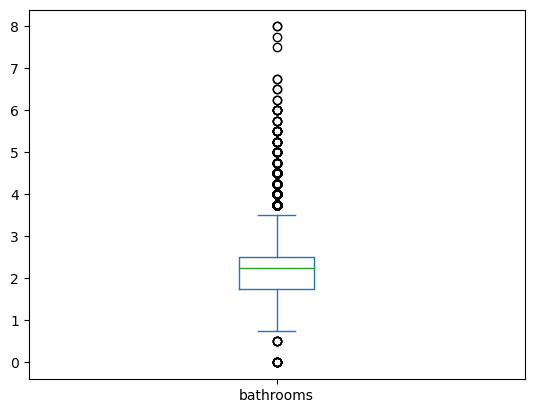

In [11]:
plt.figure()
df_houseprice['bathrooms'].plot(kind='box')
df_houseprice['bathrooms'].median()
df_houseprice['bathrooms'] = df_houseprice['bathrooms'].fillna(df_houseprice['bathrooms'].median())

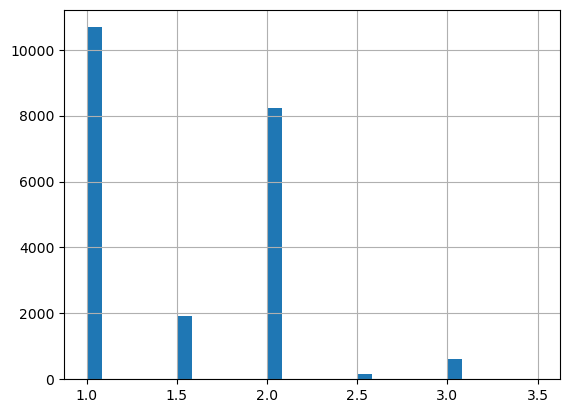

In [12]:
#FLOORS
plt.figure()
df_houseprice['floors'].hist(bins=30)
df_houseprice['floors'].median()
df_houseprice['floors'].mode()[0]
df_houseprice['floors'] = df_houseprice['floors'].fillna(df_houseprice['floors'].mode()[0])

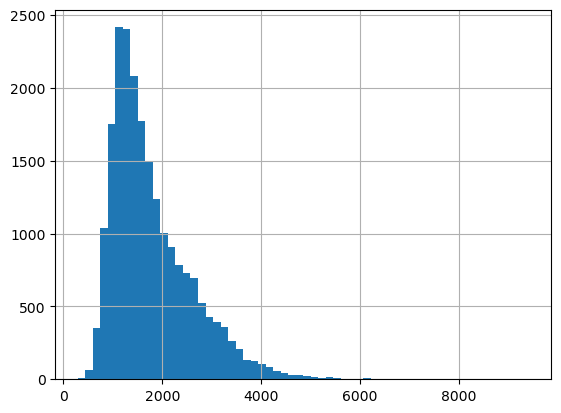

In [13]:
#LIVING SPACE ABOVE GROUND LEVEL
plt.figure()
df_houseprice['sqft_above'].hist(bins=60)
df_houseprice['sqft_above'] = df_houseprice['sqft_above'].fillna(df_houseprice['sqft_above'].median())

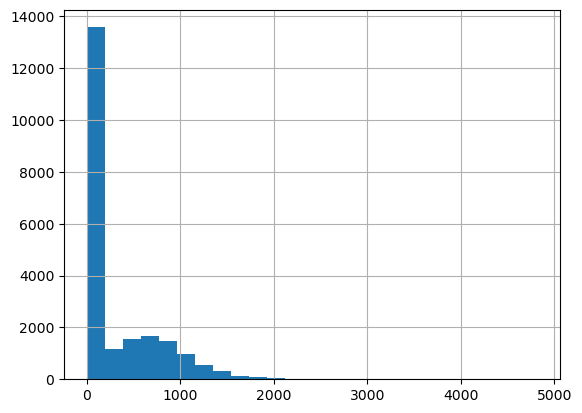

In [14]:
#BASEMENT
plt.figure()
df_houseprice['sqft_basement'].hist(bins=25)
df_houseprice['sqft_basement'] = df_houseprice['sqft_basement'].fillna(df_houseprice['sqft_basement'].mode()[0])

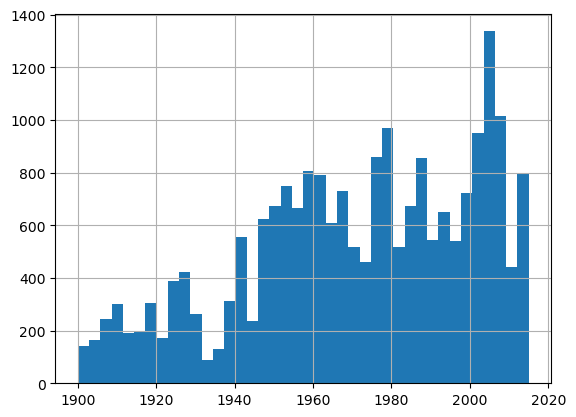

In [15]:
#YR OF BUILT
plt.figure()
df_houseprice['yr_built'].hist(bins=40)
df_houseprice['yr_built'] = df_houseprice['yr_built'].fillna(method = 'ffill')

<Axes: >

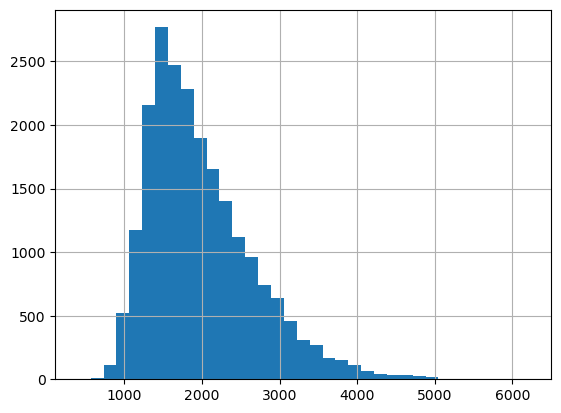

In [16]:
#LIVING SPACE OF NEAREST 15
plt.figure()
df_houseprice['sqft_living15'].hist(bins=35)

In [17]:
df_houseprice['sqft_living15'].median()
df_houseprice['sqft_living15'].mean()
df_houseprice['sqft_living15'].mode()[0]

1540.0

In [18]:
df_houseprice['sqft_living15'] = df_houseprice['sqft_living15'].fillna(df_houseprice['sqft_living15'].median())

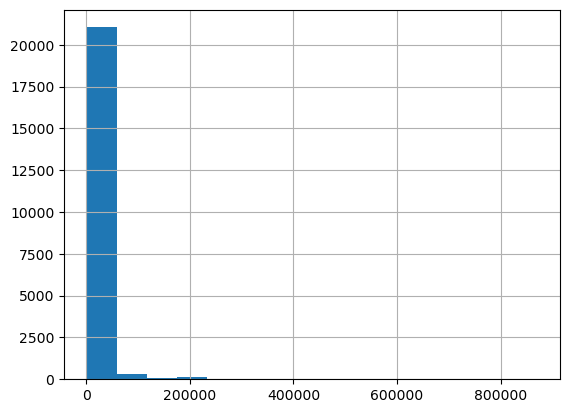

In [19]:
#PLOT AREA OF NEAREST 15
plt.figure()
df_houseprice['sqft_lot15'].hist(bins=15)
df_houseprice['sqft_lot15'] = df_houseprice['sqft_lot15'].fillna(df_houseprice['sqft_lot15'].median())

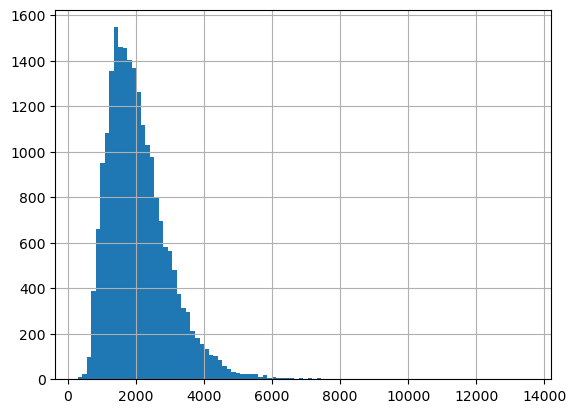

In [20]:
#LIVING SPACE
plt.figure()
df_houseprice['sqft_living'].hist(bins=100)
df_houseprice['sqft_living'] = df_houseprice['sqft_living'].fillna(df_houseprice['sqft_living'].median())

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price_by_sqft    0
dtype: int64

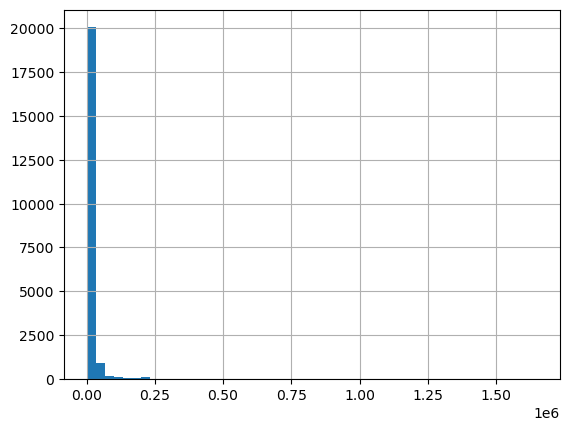

In [23]:
#PLOT AREA
plt.figure()
df_houseprice['sqft_lot'].hist(bins=50)
df_houseprice['sqft_lot'] = df_houseprice['sqft_lot'].fillna(df_houseprice['sqft_lot'].median())
df_houseprice.isna().sum()

In [24]:
df_houseprice['price'].isnull().any()

False

In [25]:
df_houseprice['sqft_living'].isnull().any()

False

In [26]:
df_houseprice['price_by_sqft'] = df_houseprice['price'] / df_houseprice['sqft_living']
df_houseprice['price_by_sqft'].isnull().any()
df_houseprice['price_by_sqft'].describe()

count    21613.000000
mean       264.169465
std        110.060832
min         87.588235
25%        182.291667
50%        244.680851
75%        318.326693
max        810.138889
Name: price_by_sqft, dtype: float64

<Axes: >

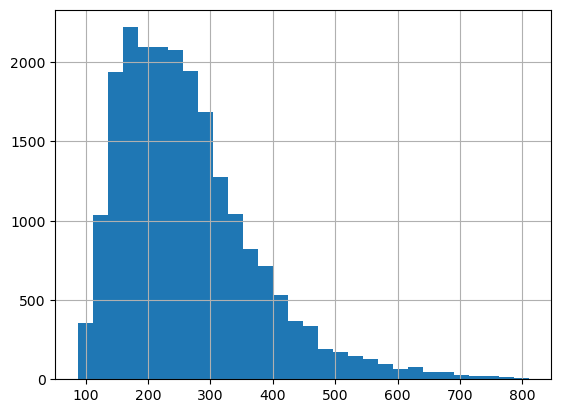

In [27]:
df_houseprice['price_by_sqft'].hist(bins=30)

In [28]:
corr_price = df_houseprice['price'].corr(df_houseprice['price_by_sqft'])
corr_price

0.5546812269271336

In [29]:
corr_sqft_living = df_houseprice['sqft_living'].corr(df_houseprice['price_by_sqft'])
corr_sqft_living

-0.09235572739268263

In [30]:
col_to_convert = ['dist_to_downtown', 'dist_to_bellevue', 'dist_to_northwest_seattle']


Stats for dist_to_downtown_km
count    21613.000000
mean        18.935686
std         11.557117
min          1.010442
25%          9.311037
50%         17.080214
75%         25.979590
max         85.056773
Name: dist_to_downtown_km, dtype: float64
Correlation dist_to_downtown_km with price (in general) column equals: -0.2104302753149724
Correlation dist_to_downtown_km with price by square foot column equals: -0.4757989863856972

Stats for dist_to_bellevue_km
count    21613.000000
mean        17.527340
std          8.653873
min          0.269451
25%         11.414254
50%         16.720946
75%         21.017196
max         75.536163
Name: dist_to_bellevue_km, dtype: float64
Correlation dist_to_bellevue_km with price (in general) column equals: -0.35852379110732124
Correlation dist_to_bellevue_km with price by square foot column equals: -0.4217023579521428

Stats for dist_to_northwest_seattle_km
count    21613.000000
mean        23.851554
std         13.845207
min          0.067363
25%  

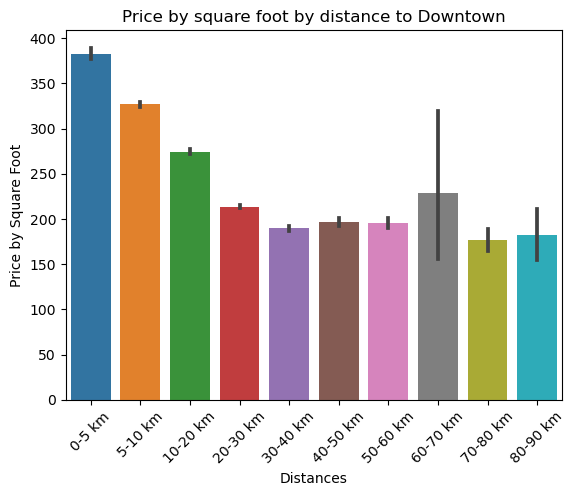

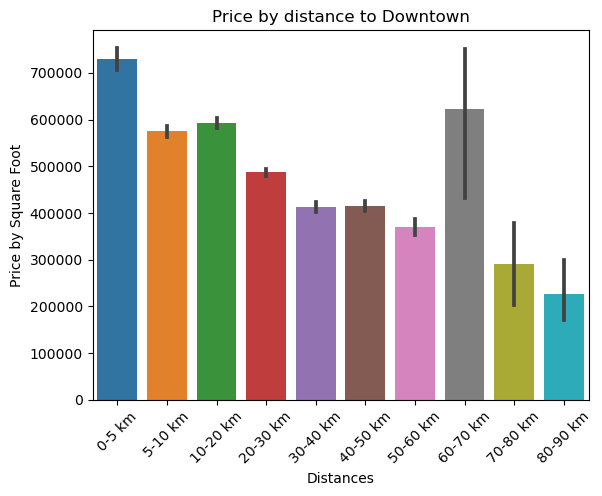

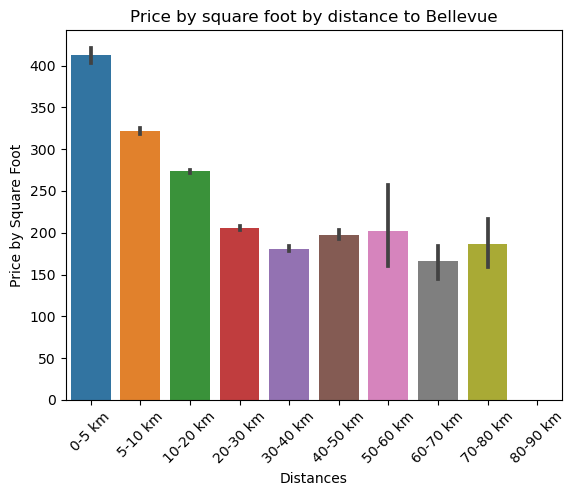

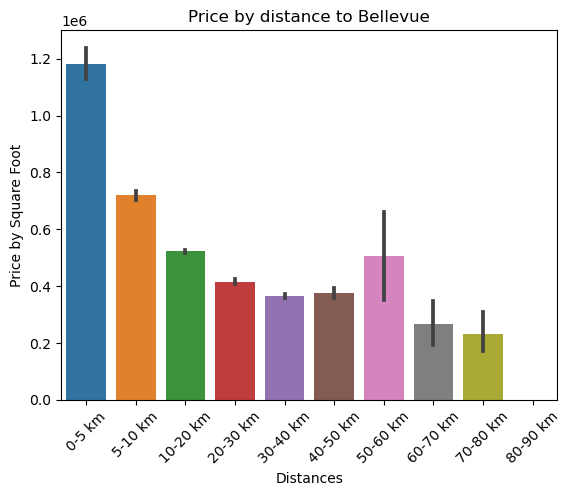

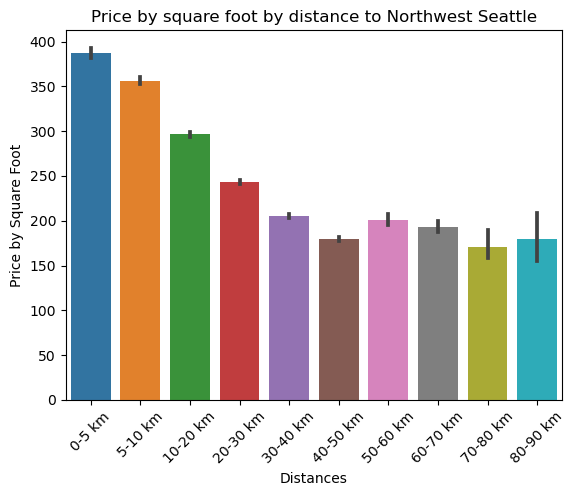

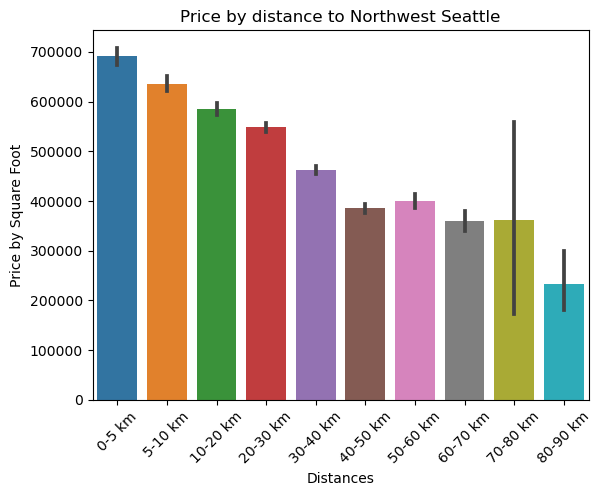

In [31]:
df_houseprice = add_distance_columns(df_houseprice, LOCATIONS)
df_houseprice = analyze_dist_col(df_houseprice, col_to_convert, conv_factor_kc)
df_houseprice = plot_dist_analysis(df_houseprice)

Text(0, 0.5, 'Count')

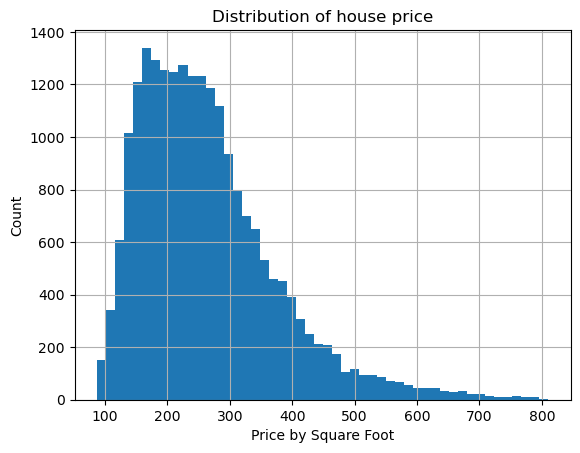

In [32]:
#EDA

#TARGET
plt.figure()
df_houseprice['price_by_sqft'].hist(bins=50)
plt.title('Distribution of house price')
plt.xlabel('Price by Square Foot')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

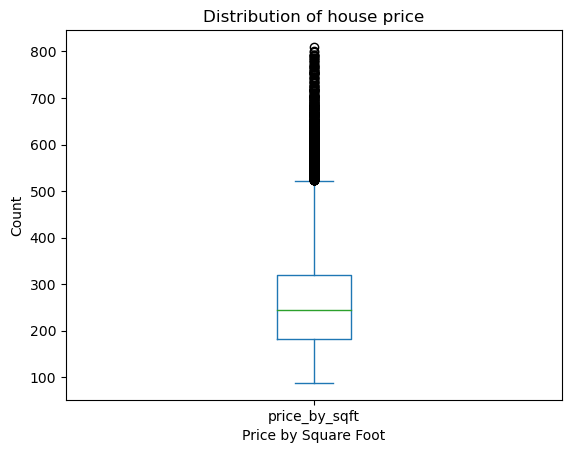

In [33]:
plt.figure()
df_houseprice['price_by_sqft'].plot(kind='box')
plt.title('Distribution of house price')
plt.xlabel('Price by Square Foot')
plt.ylabel('Count')

In [34]:
df_houseprice['price_by_sqft'].dtype
df_houseprice = df_houseprice[df_houseprice['price_by_sqft'] <= 800.0 ]

Text(0, 0.5, 'Count')

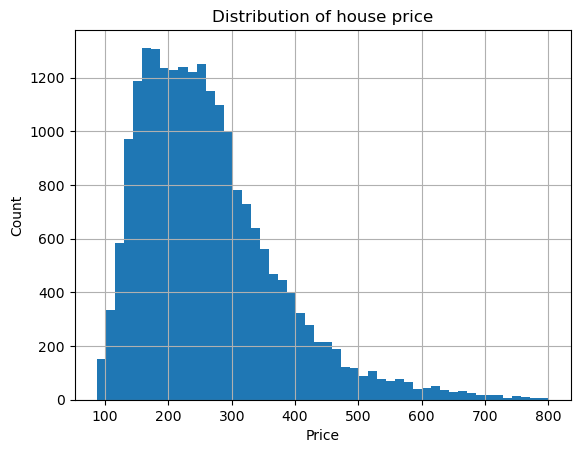

In [35]:
plt.figure()
df_houseprice['price_by_sqft'].hist(bins=50)
plt.title('Distribution of house price')
plt.xlabel('Price')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

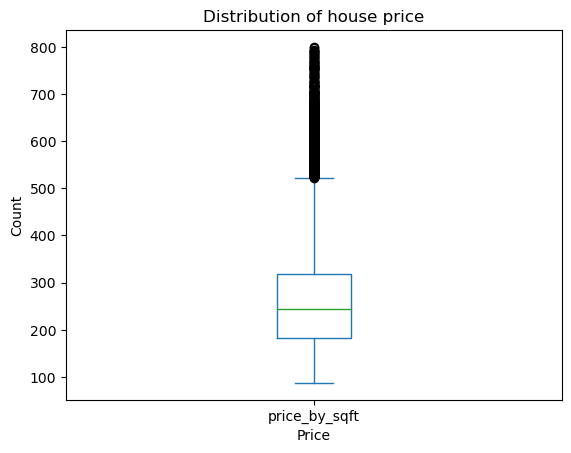

In [36]:
plt.figure()
df_houseprice['price_by_sqft'].plot(kind='box')
plt.title('Distribution of house price')
plt.xlabel('Price')
plt.ylabel('Count')

In [37]:
df_houseprice['price_by_sqft_log'] = np.log(df_houseprice['price_by_sqft'])

Text(0, 0.5, 'Count')

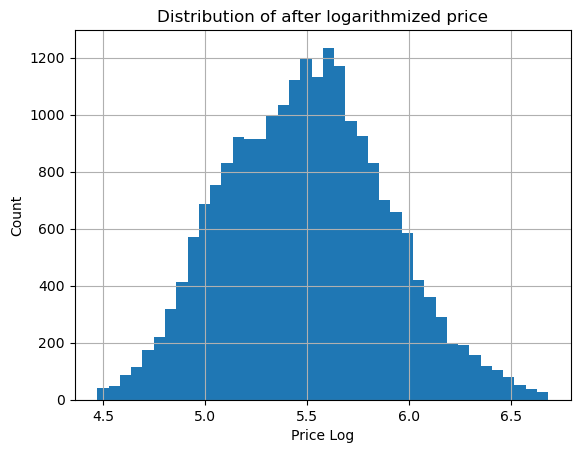

In [38]:
plt.figure()
df_houseprice['price_by_sqft_log'].hist(bins=40)
plt.title('Distribution of after logarithmized price')
plt.xlabel('Price Log')
plt.ylabel('Count')

<Axes: >

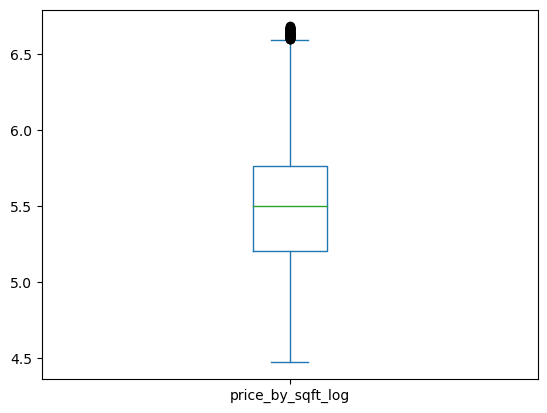

In [39]:
plt.figure()
df_houseprice['price_by_sqft_log'].plot.box()

In [41]:
#What is the range of price?
df_houseprice['price_by_sqft'].min()

87.58823529411765

In [42]:
df_houseprice['price_by_sqft'].max()

800.0

Text(0, 0.5, 'Count')

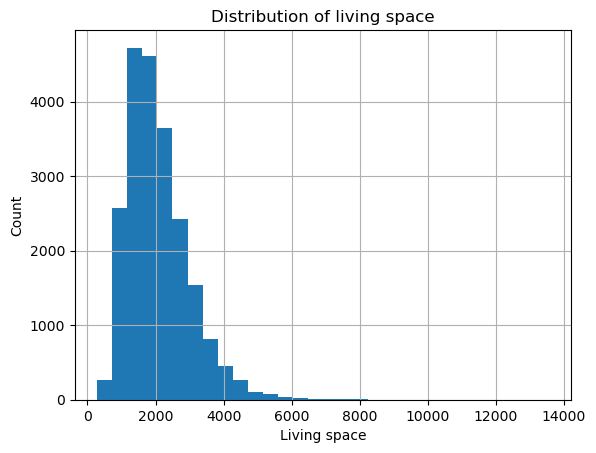

In [43]:
#Does living space affect the price?
plt.figure()
df_houseprice['sqft_living'].hist(bins=30)
plt.title('Distribution of living space')
plt.xlabel('Living space')
plt.ylabel('Count')

Text(0.5, 0, 'Living space')

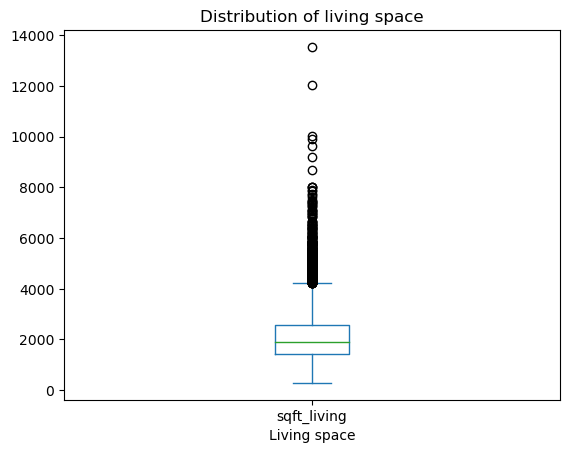

In [44]:
plt.figure()
df_houseprice['sqft_living'].plot.box()
plt.title('Distribution of living space')
plt.xlabel('Living space')

In [45]:
df_houseprice = df_houseprice[df_houseprice['sqft_living'] <= 8000.0]

Text(0, 0.5, 'Price')

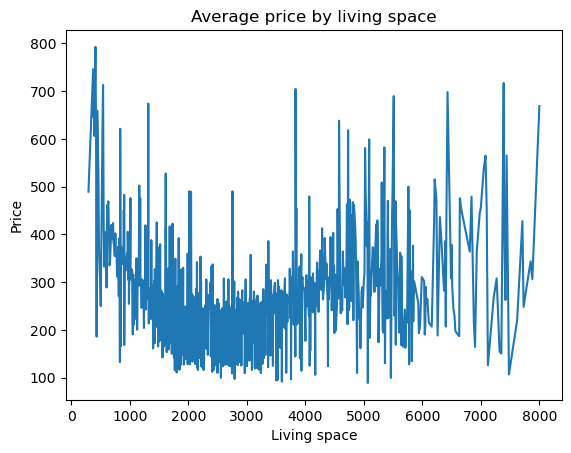

In [46]:
living_space_price = df_houseprice.groupby(df_houseprice['sqft_living'])['price_by_sqft'].mean()

plt.figure()
living_space_price.plot(kind='line')
plt.title('Average price by living space')
plt.xlabel('Living space')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

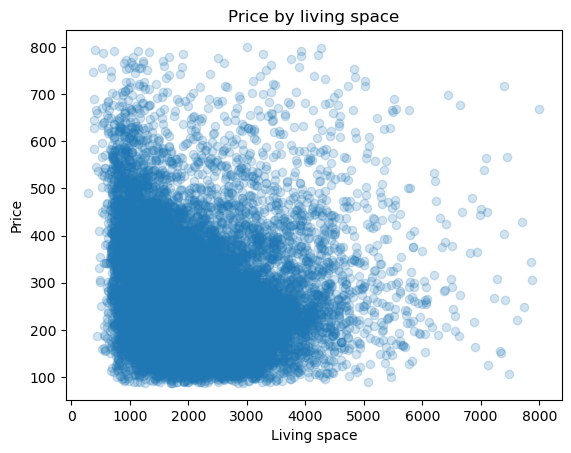

In [47]:
plt.figure()
plt.scatter(df_houseprice['sqft_living'], df_houseprice['price_by_sqft'], alpha=0.2)
plt.title('Price by living space')
plt.xlabel('Living space')
plt.ylabel('Price')

In [48]:
corr_living_space = df_houseprice['sqft_living'].corr(df_houseprice['price_by_sqft'])
f'Correlation coefficient equals {corr_living_space}'

'Correlation coefficient equals -0.1018095151473369'

Text(0, 0.5, 'Count')

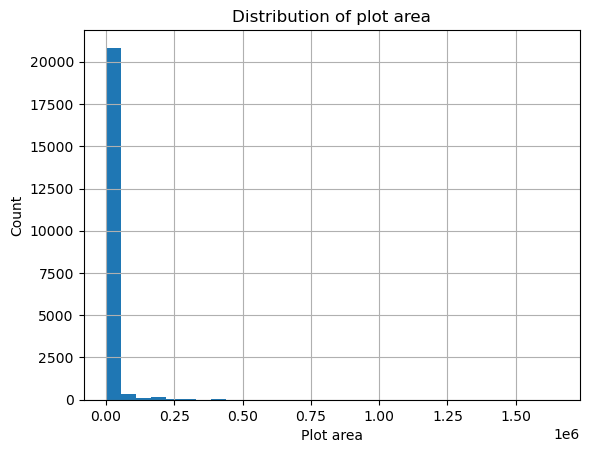

In [49]:
#Does plot area affect the price?
plt.figure()
df_houseprice['sqft_lot'].hist(bins=30)
plt.title('Distribution of plot area')
plt.xlabel('Plot area')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

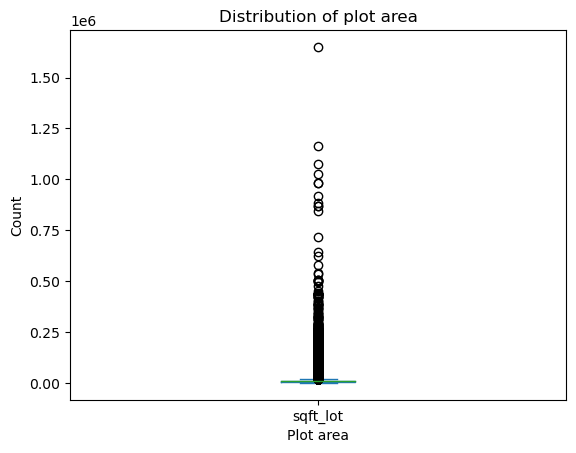

In [50]:
plt.figure()
df_houseprice['sqft_lot'].plot.box()
plt.title('Distribution of plot area')
plt.xlabel('Plot area')
plt.ylabel('Count')

In [51]:
plot_area_price = df_houseprice.groupby(df_houseprice['sqft_lot'])['price_by_sqft'].mean()

Text(0, 0.5, 'Price')

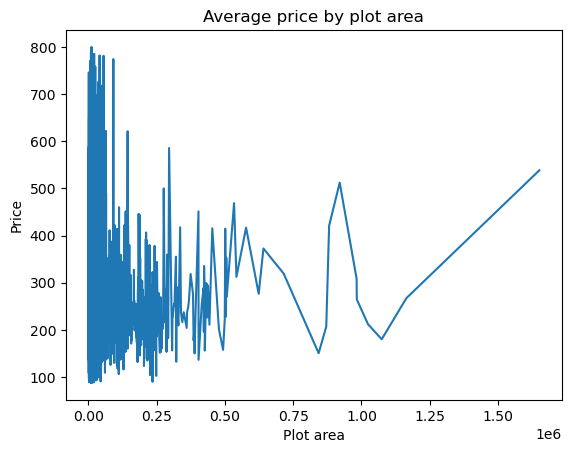

In [52]:
plt.figure()
plot_area_price.plot(kind='line')
plt.title('Average price by plot area')
plt.xlabel('Plot area')
plt.ylabel('Price')

Text(0, 0.5, 'price')

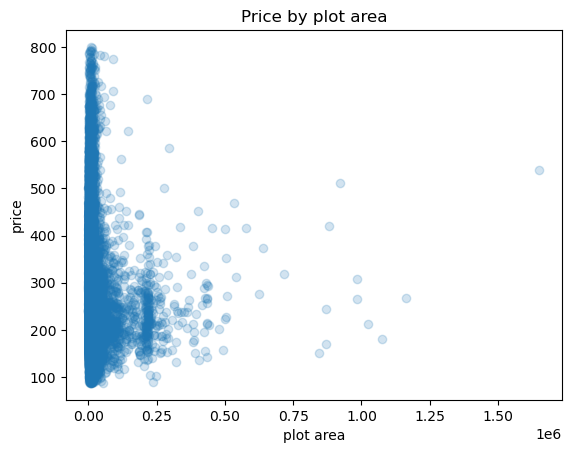

In [53]:
plt.figure()
plt.scatter(df_houseprice['sqft_lot'], df_houseprice['price_by_sqft'], alpha=0.2)
plt.title('Price by plot area')
plt.xlabel('plot area')
plt.ylabel('price')

In [54]:
corr_plot_area = df_houseprice['sqft_lot'].corr(df_houseprice['price_by_sqft'])
f'Correlation coefficient equals {corr_plot_area}'

'Correlation coefficient equals -0.03402220392899152'

In [55]:
df_houseprice = df_houseprice[df_houseprice['sqft_lot'] <= 500000.0]

<Axes: >

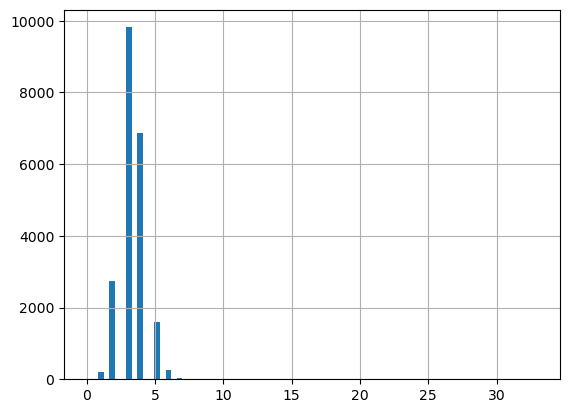

In [56]:
#How the number of bedrooms and bathrooms affect the price?
plt.figure()
df_houseprice['bedrooms'].hist(bins=80)

In [57]:
number_of_records_per_bedroom = df_houseprice.groupby('bedrooms').size()
number_of_records_per_bedroom

bedrooms
0       13
1      198
2     2754
3     9818
4     6875
5     1593
6      270
7       37
8       13
9        6
10       3
11       1
33       1
dtype: int64

Text(0, 0.5, 'Count')

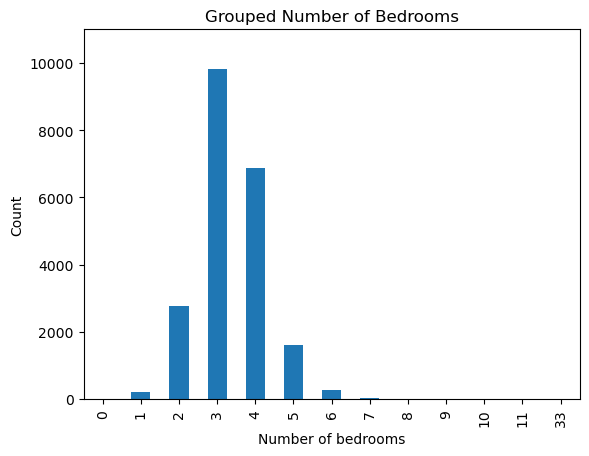

In [58]:
plt.figure()
number_of_records_per_bedroom.plot(kind='bar')
plt.ylim(0, 11000)
plt.title('Grouped Number of Bedrooms')
plt.xlabel('Number of bedrooms')
plt.ylabel('Count')

Text(0, 0.5, 'Price')

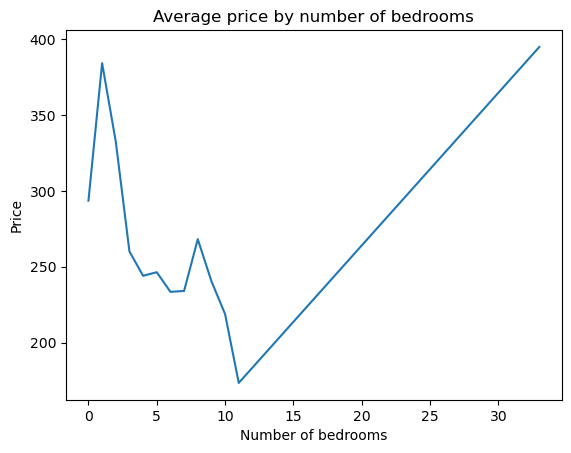

In [59]:
number_of_bedrooms = df_houseprice.groupby('bedrooms')['price_by_sqft'].mean()

plt.figure()
number_of_bedrooms.plot(kind='line')
plt.title('Average price by number of bedrooms')
plt.xlabel('Number of bedrooms')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

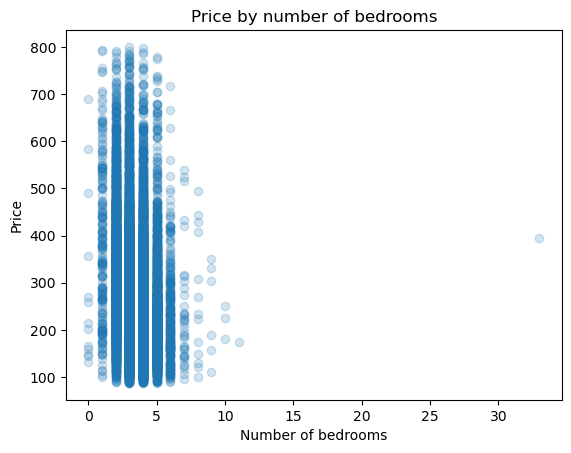

In [60]:
plt.figure()
plt.scatter(df_houseprice['bedrooms'], df_houseprice['price_by_sqft'], alpha=0.2)
plt.title('Price by number of bedrooms')
plt.xlabel('Number of bedrooms')
plt.ylabel('Price')

Text(0.5, 1.0, 'Number of bedrooms')

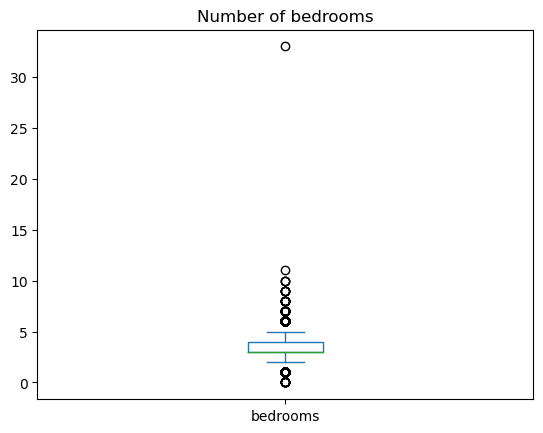

In [61]:
plt.figure()
df_houseprice['bedrooms'].plot.box()
plt.title('Number of bedrooms')

In [62]:
corr_bedrooms_price = df_houseprice['bedrooms'].corr(df_houseprice['price_by_sqft'])
f'Correlation coefficient equals {corr_bedrooms_price}'

'Correlation coefficient equals -0.20817790905426445'

In [63]:
df_houseprice = df_houseprice[df_houseprice['bedrooms'] <= 9.0 ]

<Axes: >

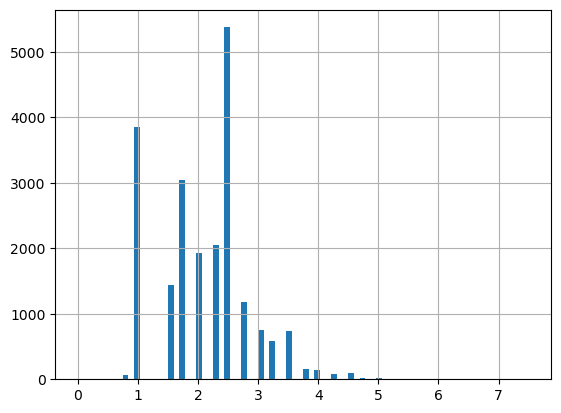

In [64]:
plt.figure()
df_houseprice['bathrooms'].hist(bins=80)

Text(0, 0.5, 'Count')

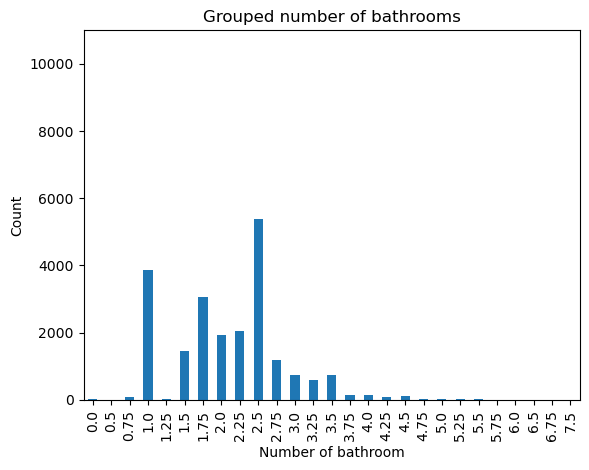

In [66]:
number_of_records_per_bathroom = df_houseprice.groupby('bathrooms').size()

plt.figure()
number_of_records_per_bathroom.plot(kind='bar')
plt.ylim(0, 11000)
plt.title('Grouped number of bathrooms')
plt.xlabel('Number of bathroom')
plt.ylabel('Count')

Text(0, 0.5, 'Price')

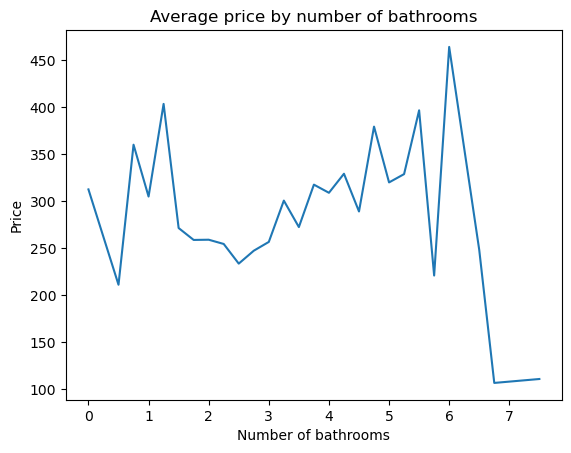

In [67]:
plt.figure()
number_of_bathrooms = df_houseprice.groupby('bathrooms')['price_by_sqft'].mean()
number_of_bathrooms.plot(kind='line')
plt.title('Average price by number of bathrooms')
plt.xlabel('Number of bathrooms')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

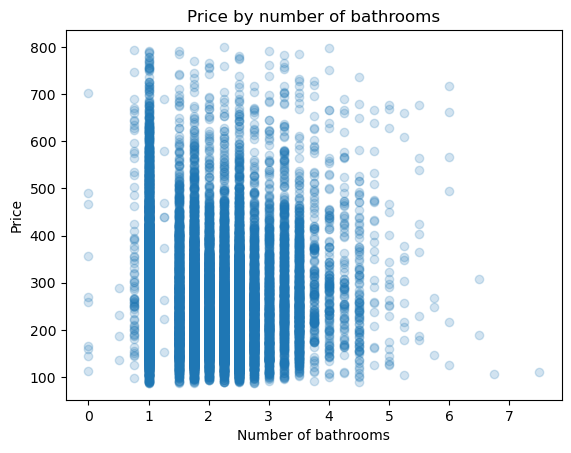

In [68]:
plt.figure()
plt.scatter(df_houseprice['bathrooms'], df_houseprice['price_by_sqft'], alpha=0.2)
plt.title('Price by number of bathrooms')
plt.xlabel('Number of bathrooms')
plt.ylabel('Price')

Text(0.5, 1.0, 'Number of bathrooms')

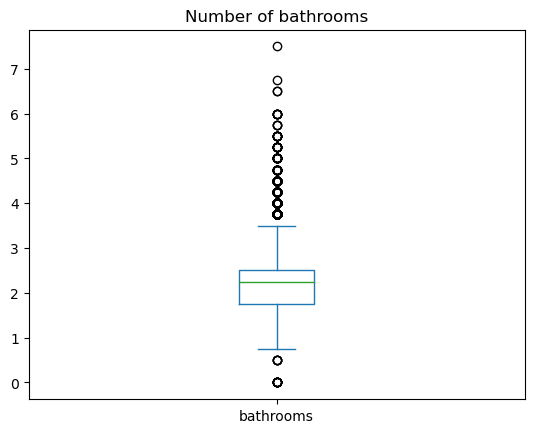

In [69]:
plt.figure()
df_houseprice['bathrooms'].plot.box()
plt.title('Number of bathrooms')

In [70]:
corr_bedrooms_price = df_houseprice['bathrooms'].corr(df_houseprice['price_by_sqft'])
f'Correlation coefficient equals {corr_bedrooms_price}'

'Correlation coefficient equals -0.09682704545272575'

In [71]:
df_houseprice = df_houseprice[(df_houseprice['bathrooms'] <= 4.5) & (df_houseprice['bathrooms'] >= 0.75)]

Text(0, 0.5, 'Count')

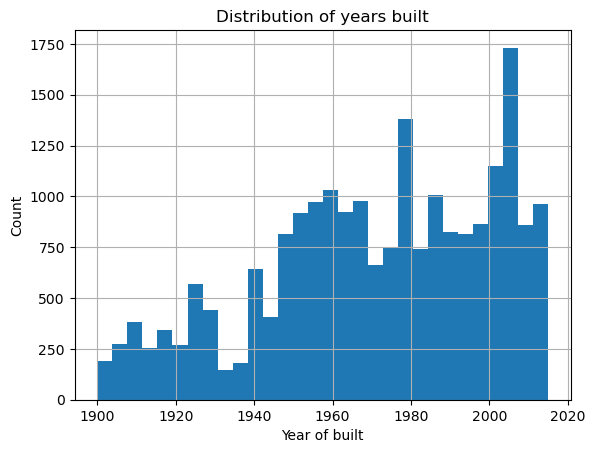

In [72]:
#Does the year of built affect the price?
plt.figure()
df_houseprice['yr_built'].hist(bins=30)
plt.title('Distribution of years built')
plt.xlabel('Year of built')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

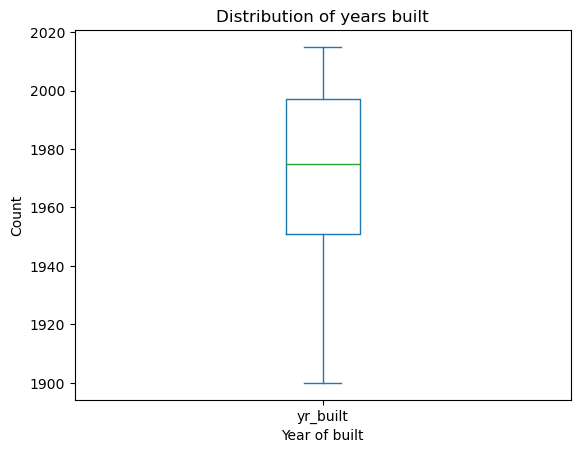

In [73]:
plt.figure()
df_houseprice['yr_built'].plot.box()
plt.title('Distribution of years built')
plt.xlabel('Year of built')
plt.ylabel('Count')

Text(0, 0.5, 'Price of house')

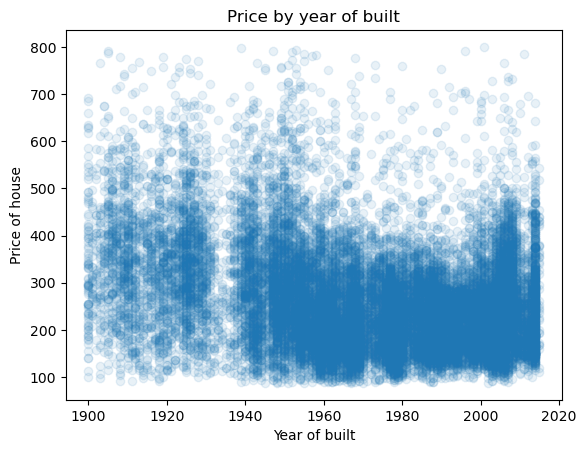

In [74]:
plt.figure()
plt.scatter(df_houseprice['yr_built'], df_houseprice['price_by_sqft'], alpha=0.1) 
plt.title('Price by year of built')
plt.xlabel('Year of built')
plt.ylabel('Price of house')

In [75]:
#decade
df_houseprice['decade'] = (df_houseprice['yr_built'] // 10) * 10
decade_price_mean = df_houseprice.groupby('decade')['price_by_sqft'].mean()

Text(0, 0.5, 'Average price')

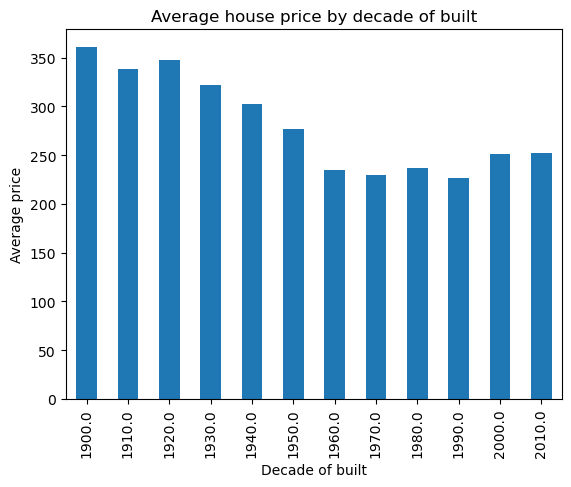

In [76]:
plt.figure()
decade_price_mean.plot(kind='bar') 
plt.title('Average house price by decade of built')
plt.xlabel('Decade of built')
plt.ylabel('Average price')

Text(0, 0.5, 'Price')

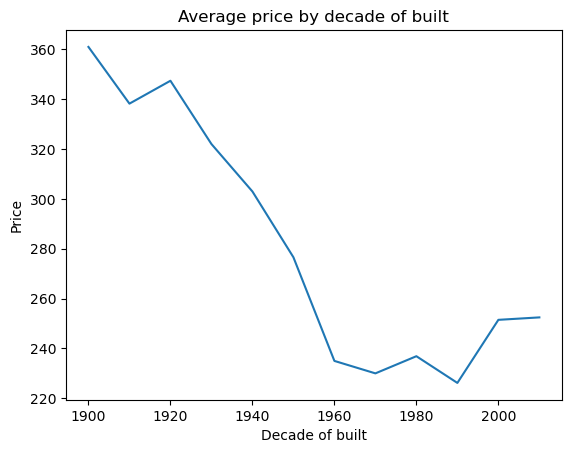

In [77]:
plt.figure()
decade_price_mean.plot(kind='line')
plt.title('Average price by decade of built')
plt.xlabel('Decade of built')
plt.ylabel('Price')

In [78]:
corr_decade_built = df_houseprice['decade'].corr(df_houseprice['price_by_sqft'])
f'Correlation coefficient equals {corr_decade_built}'

'Correlation coefficient equals -0.2922254308085904'

In [79]:
#Have house prices changed over time?
df_houseprice['date'] = pd.to_datetime(df_houseprice['date'])
df_houseprice['date'].info()

<class 'pandas.core.series.Series'>
Index: 21486 entries, 0 to 21612
Series name: date
Non-Null Count  Dtype         
--------------  -----         
21486 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 335.7 KB


Text(0, 0.5, 'Price')

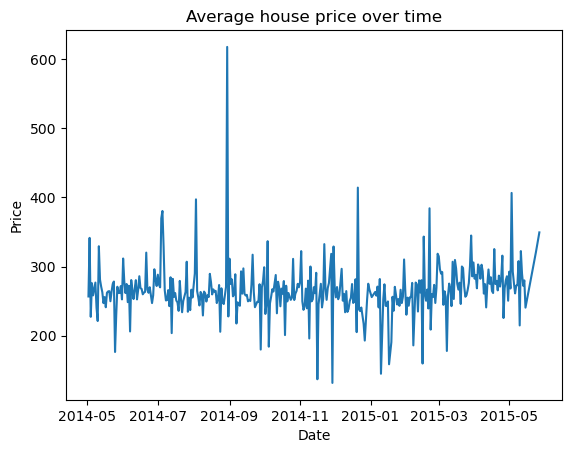

In [81]:
#mean price for day
daily_price_mean = df_houseprice.groupby(df_houseprice['date'].dt.date)['price_by_sqft'].mean()

plt.figure()
daily_price_mean.plot(kind='line')
plt.title('Average house price over time')
plt.xlabel('Date')
plt.ylabel('Price')

In [82]:
#Are renovated houses more expensive?

renovated_houses = df_houseprice[df_houseprice['yr_renovated'] != 0]
non_renovated_houses = df_houseprice[df_houseprice['yr_renovated'] == 0]
avg_price_of_renovated = renovated_houses['price_by_sqft'].mean()
avg_price_of_non_renovated = non_renovated_houses['price_by_sqft'].mean()
median_of_renovated = renovated_houses['price_by_sqft'].median()
median_of_non_renovated = non_renovated_houses['price_by_sqft'].median()

In [84]:
f'Average price of renoavted houses is {avg_price_of_renovated}, and average price of non renovated is {avg_price_of_non_renovated}'

'Average price of renoavted houses is 318.45328147791787, and average price of non renovated is 261.26635826870614'

In [85]:
f'Median price of renovated houses is {median_of_renovated}, and non renovated houses is {median_of_non_renovated}'

'Median price of renovated houses is 297.6744186046512, and non renovated houses is 242.71844660194174'

Text(0, 0.5, 'Count')

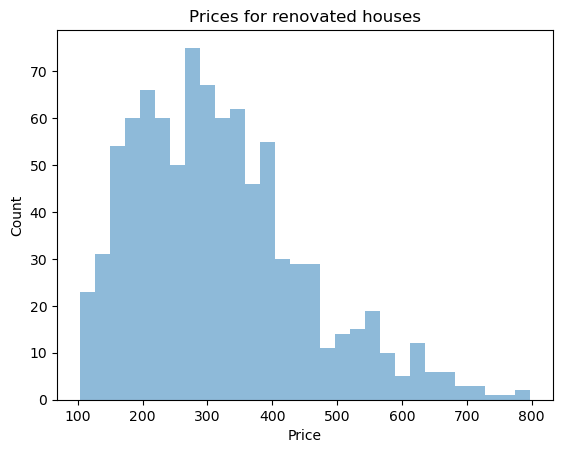

In [86]:
plt.figure()
plt.hist(renovated_houses['price_by_sqft'], bins=30, alpha=0.5, label='Renovated')
plt.title('Prices for renovated houses')
plt.xlabel('Price')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

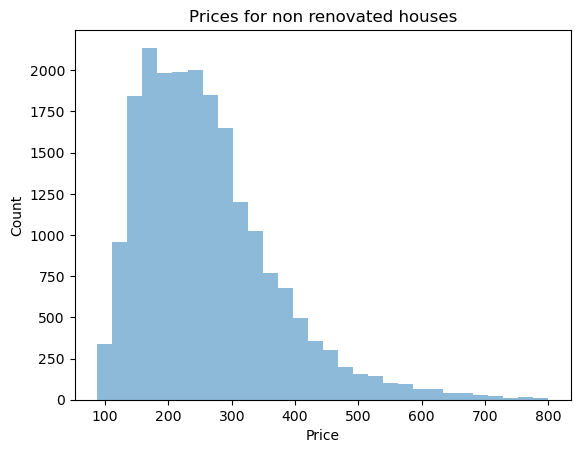

In [87]:
plt.figure()
plt.hist(non_renovated_houses['price_by_sqft'], bins=30, alpha=0.5, label='Non Renovated')
plt.title('Prices for non renovated houses')
plt.xlabel('Price')
plt.ylabel('Count')

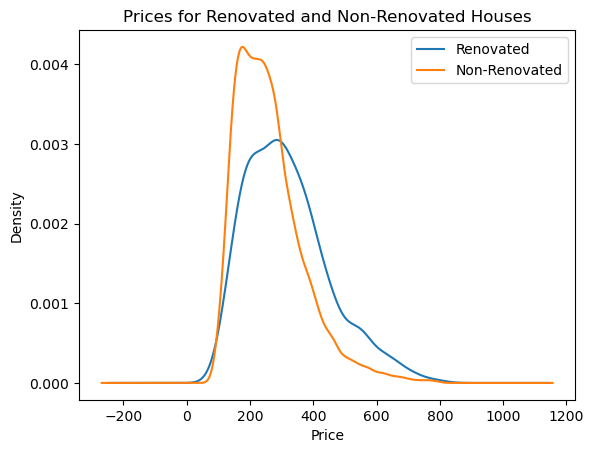

In [88]:
plt.figure()
renovated_houses['price_by_sqft'].plot(kind='density', label='Renovated')
non_renovated_houses['price_by_sqft'].plot(kind='density', label='Non-Renovated')
plt.title('Prices for Renovated and Non-Renovated Houses')
plt.xlabel('Price')
plt.legend()
plt.show()

Text(0, 0.5, 'Price')

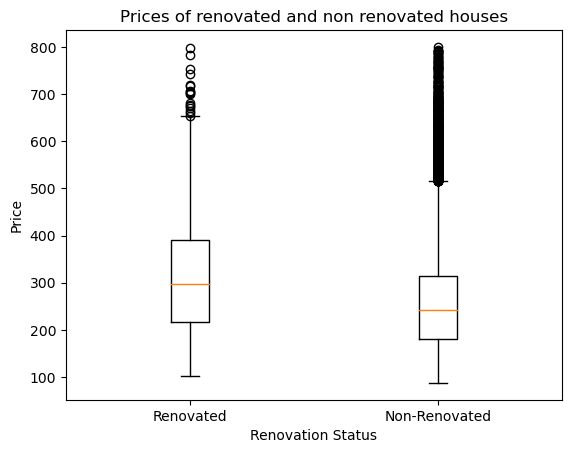

In [89]:
plt.figure()
plt.boxplot([renovated_houses['price_by_sqft'], non_renovated_houses['price_by_sqft']], labels=['Renovated', 'Non-Renovated'])
plt.title('Prices of renovated and non renovated houses')
plt.xlabel('Renovation Status')
plt.ylabel('Price')

In [90]:
corr_renovated = df_houseprice['yr_renovated'].corr(df_houseprice['price_by_sqft'])
corr_renovated

0.1052032032216562

In [91]:
#Do additional factors like basement space increase the price?
houses_with_basement = df_houseprice[df_houseprice['sqft_basement'] != 0]
houses_without_basement = df_houseprice[df_houseprice['sqft_basement'] == 0]

avg_price_with_basement = houses_with_basement['price_by_sqft'].mean()
avg_price_without_basement = houses_without_basement['price_by_sqft'].mean()

f'Average price of house with basement is {avg_price_with_basement}, and without basement is {avg_price_without_basement}'

'Average price of house with basement is 266.4968161985463, and without basement is 261.85814339240943'

<Axes: >

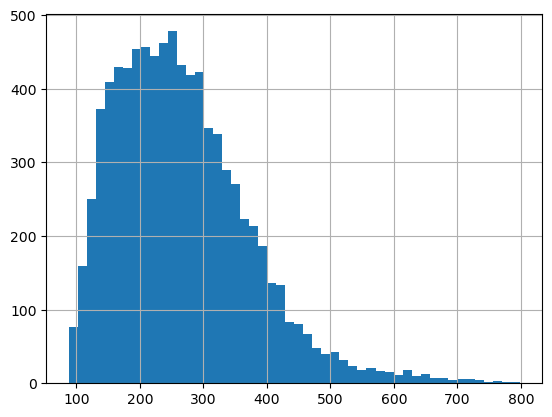

In [92]:
plt.figure()
houses_with_basement['price_by_sqft'].hist(bins=50)

<Axes: >

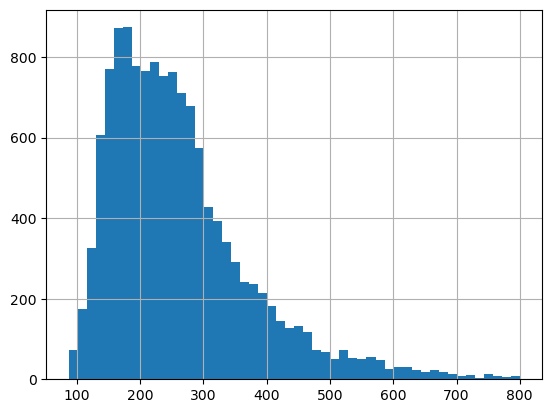

In [93]:
plt.figure()
houses_without_basement['price_by_sqft'].hist(bins=50)

Text(0, 0.5, 'Price')

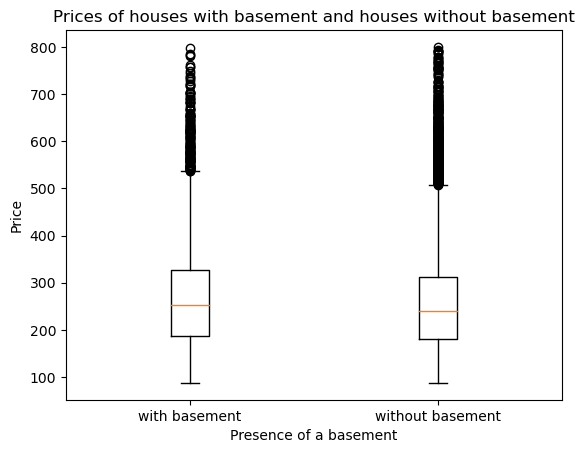

In [94]:
plt.figure()
plt.boxplot([houses_with_basement['price_by_sqft'], houses_without_basement['price_by_sqft']], labels=['with basement', 'without basement'])
plt.title('Prices of houses with basement and houses without basement')
plt.xlabel('Presence of a basement')
plt.ylabel('Price')

In [95]:
median_price_with_basement = houses_with_basement['price_by_sqft'].median()
median_price_with_basement = houses_with_basement['price_by_sqft'].median()
f'Median price of house with basement is {median_price_with_basement}, and without basement is {median_price_with_basement}'

'Median price of house with basement is 251.81839822259838, and without basement is 251.81839822259838'

In [97]:
Q1 = houses_with_basement['price_by_sqft'].quantile(0.25)
Q3 = houses_with_basement['price_by_sqft'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR #bounds for outliers
upper_bound = Q3 + 1.5 * IQR

outliers = houses_with_basement[(houses_with_basement['price_by_sqft'] < lower_bound) | (houses_with_basement['price_by_sqft'] > upper_bound)]

number_of_outliers = outliers.shape[0]
f'Numbers of outliers for group of houses with basement: {number_of_outliers}'

'Numbers of outliers for group of houses with basement: 174'

In [99]:
Q1_without = houses_without_basement['price_by_sqft'].quantile(0.25)
Q3_without = houses_without_basement['price_by_sqft'].quantile(0.75)

IQR_without = Q3_without - Q1_without

lower_bound_without = Q1_without - 1.5 * IQR #bounds for outliers
upper_bound_without = Q3_without + 1.5 * IQR

outliers_without = houses_without_basement[(houses_without_basement['price_by_sqft'] < lower_bound_without) | (houses_without_basement['price_by_sqft'] > upper_bound_without)]

number_of_outliers_without = outliers_without.shape[0]
f'Numbers of outliers for group of houses with basement: {number_of_outliers_without}'

'Numbers of outliers for group of houses with basement: 483'

In [100]:
corr_basement = df_houseprice['sqft_basement'].corr(df_houseprice['price_by_sqft'])
corr_basement

-0.035877477411517235

In [101]:
std_basement = houses_with_basement['price_by_sqft'].std()
std_without_basement = houses_without_basement['price_by_sqft'].std()

In [102]:
cv_with_basement = std_basement / avg_price_with_basement
cv_with_basement

0.3981793342264055

In [103]:
cv_without_basement = std_without_basement / avg_price_without_basement
cv_without_basement

0.4254661049632254

Text(0, 0.5, 'Count')

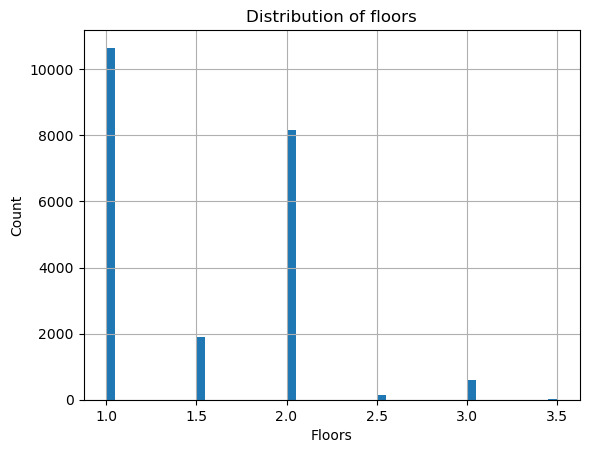

In [104]:
#Does the number of floors correlate with the price of a property?
plt.figure()
df_houseprice['floors'].hist(bins=50)
plt.title('Distribution of floors')
plt.xlabel('Floors')
plt.ylabel('Count')

In [105]:
grouped_floors = df_houseprice.groupby('floors')['price_by_sqft'].mean()

f'Average prices of houses by number of floors are: {grouped_floors}'

'Average prices of houses by number of floors are: floors\n1.0    264.484881\n1.5    299.209401\n2.0    248.423285\n2.5    315.021671\n3.0    328.540814\n3.5    346.114284\nName: price_by_sqft, dtype: float64'

Text(0, 0.5, 'Price')

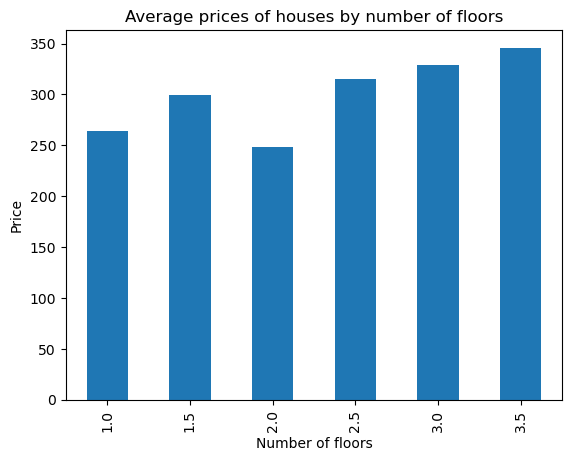

In [106]:
plt.figure()
grouped_floors.plot(kind='bar')
plt.title('Average prices of houses by number of floors')
plt.xlabel('Number of floors')
plt.ylabel('Price')

In [107]:
corr_floors = df_houseprice['floors'].corr(df_houseprice['price_by_sqft'])
f'Correlation coefficient equals {corr_plot_area}'

'Correlation coefficient equals -0.03402220392899152'

Text(0, 0.5, 'Count')

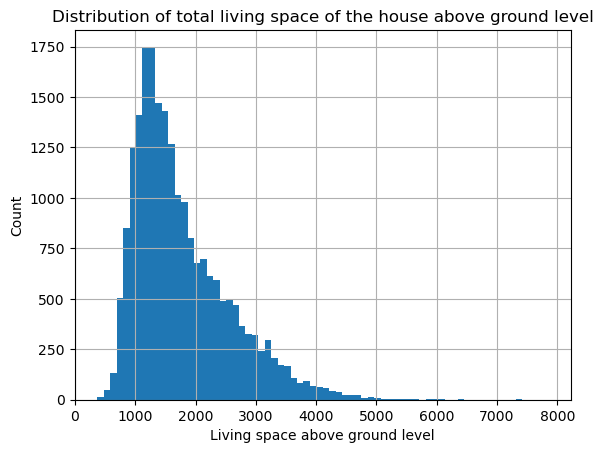

In [108]:
# Does the total living space of the house above ground level affect the price?
plt.figure()
df_houseprice['sqft_above'].hist(bins=70)
plt.title('Distribution of total living space of the house above ground level')
plt.xlabel('Living space above ground level')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

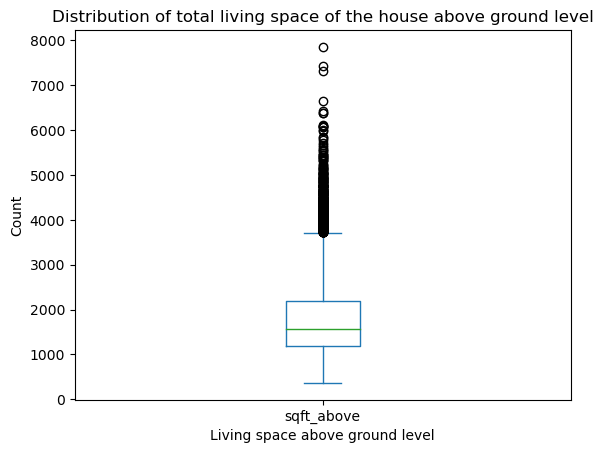

In [109]:
plt.figure()
df_houseprice['sqft_above'].plot.box()
plt.title('Distribution of total living space of the house above ground level')
plt.xlabel('Living space above ground level')
plt.ylabel('Count')

Text(0, 0.5, 'Price')

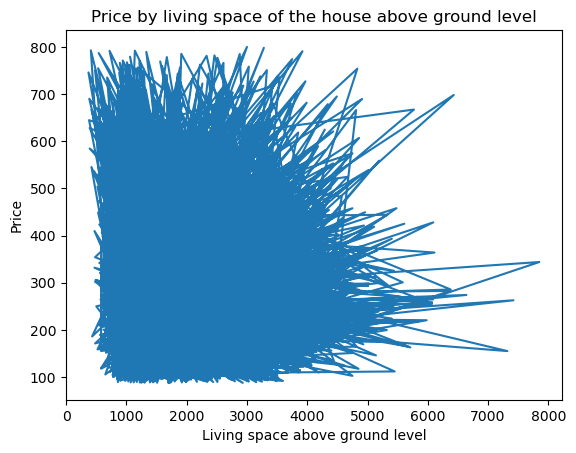

In [110]:
plt.figure()
plt.plot(df_houseprice['sqft_above'], df_houseprice['price_by_sqft'])
plt.title('Price by living space of the house above ground level')
plt.xlabel('Living space above ground level')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

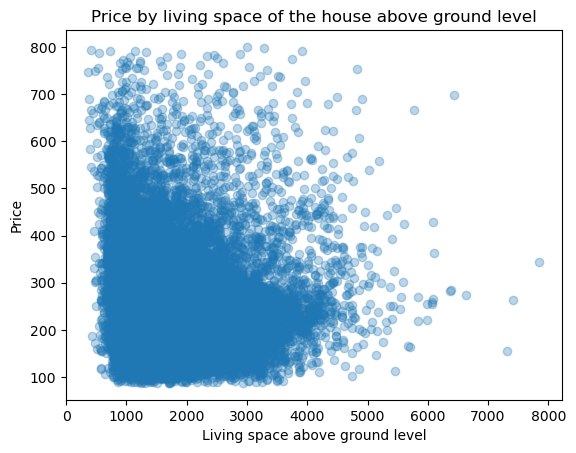

In [111]:
plt.figure()
plt.scatter(df_houseprice['sqft_above'], df_houseprice['price_by_sqft'], alpha=0.3)
plt.title('Price by living space of the house above ground level')
plt.xlabel('Living space above ground level')
plt.ylabel('Price')

In [112]:
corr_living_space_above = df_houseprice['sqft_above'].corr(df_houseprice['price_by_sqft'])
f'Correlation coefficient equals {corr_living_space_above}'

'Correlation coefficient equals -0.10966726608159089'

In [113]:
df_houseprice = df_houseprice[df_houseprice['sqft_above'] <= 6000.0 ]

Text(0, 0.5, 'Count')

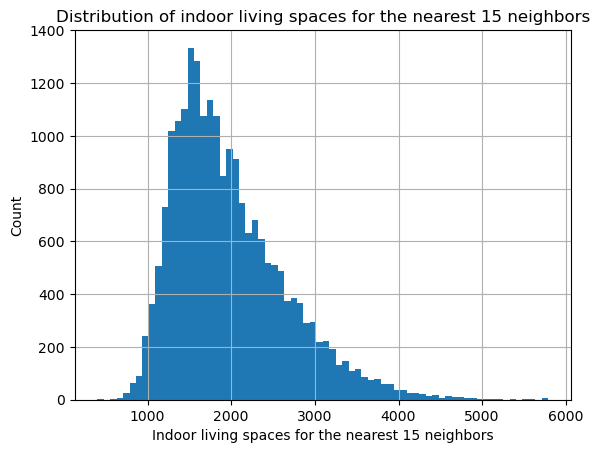

In [114]:
#Does the living space of indoor living spaces for the nearest 15 neighbors affect the price?
#Does a similar correlation occur for the area of lots for the nearest 15 neighbors?
plt.figure()
df_houseprice['sqft_living15'].hist(bins=70)
plt.title('Distribution of indoor living spaces for the nearest 15 neighbors')
plt.xlabel('Indoor living spaces for the nearest 15 neighbors')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

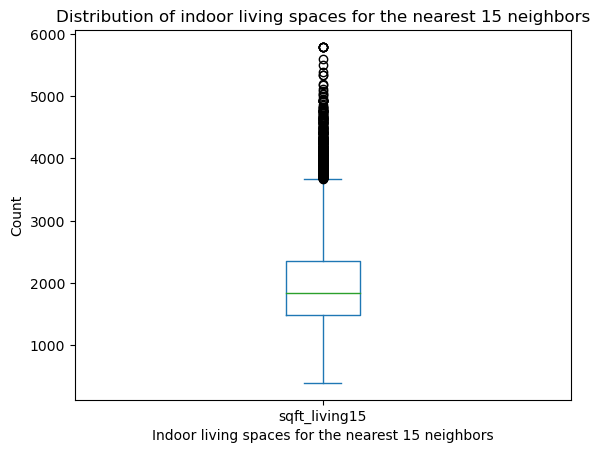

In [115]:
plt.figure()
df_houseprice['sqft_living15'].plot.box()
plt.title('Distribution of indoor living spaces for the nearest 15 neighbors')
plt.xlabel('Indoor living spaces for the nearest 15 neighbors')
plt.ylabel('Count')

Text(0, 0.5, 'Price')

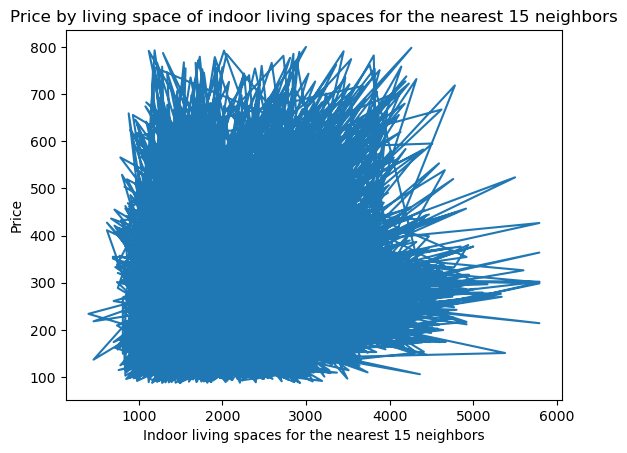

In [116]:
plt.figure()
plt.plot(df_houseprice['sqft_living15'], df_houseprice['price_by_sqft'])
plt.title('Price by living space of indoor living spaces for the nearest 15 neighbors')
plt.xlabel('Indoor living spaces for the nearest 15 neighbors')
plt.ylabel('Price')

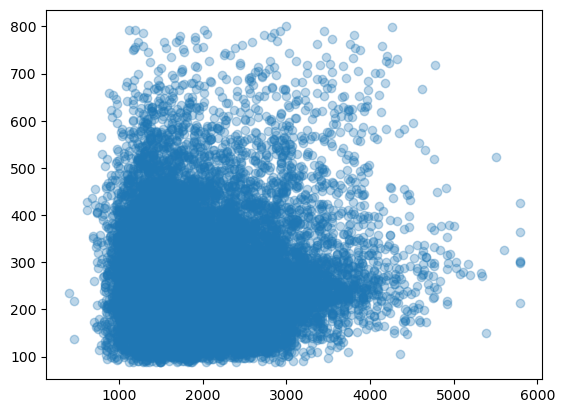

In [117]:
plt.figure()
plt.scatter(df_houseprice['sqft_living15'], df_houseprice['price_by_sqft'], alpha=0.3)

In [118]:
corr_living_15 = df_houseprice['sqft_living15'].corr(df_houseprice['price_by_sqft'])
f'Correlation coefficient equals {corr_living_15}'

'Correlation coefficient equals 0.027978890411587368'

In [119]:
df_houseprice = df_houseprice[df_houseprice['sqft_living15'] <= 5000.0]

Text(0, 0.5, 'Count')

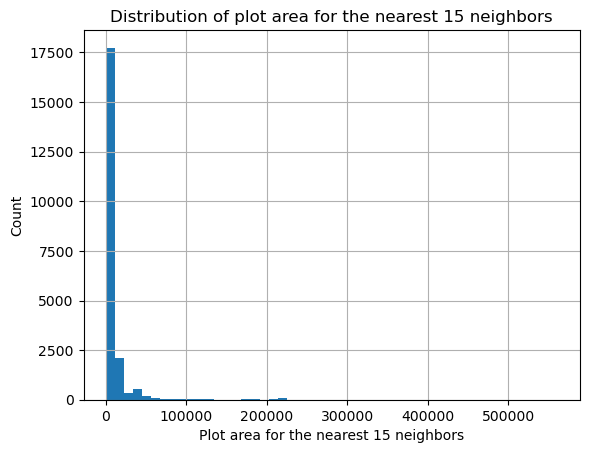

In [120]:
#Does the plot area of the nearest 15 neighbors affect the price?
plt.figure()
df_houseprice['sqft_lot15'].hist(bins=50)
plt.title('Distribution of plot area for the nearest 15 neighbors')
plt.xlabel('Plot area for the nearest 15 neighbors')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

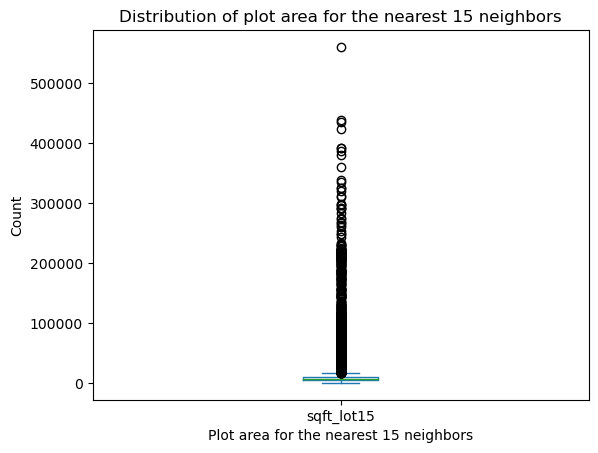

In [121]:
plt.figure()
df_houseprice['sqft_lot15'].plot.box()
plt.title('Distribution of plot area for the nearest 15 neighbors')
plt.xlabel('Plot area for the nearest 15 neighbors')
plt.ylabel('Count')

Text(0, 0.5, 'Price')

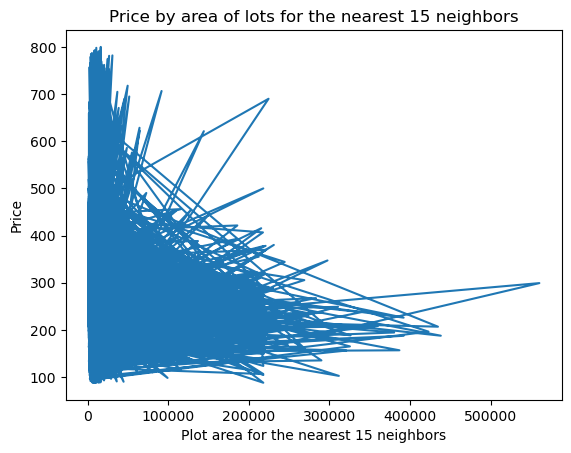

In [122]:
plt.figure()
plt.plot(df_houseprice['sqft_lot15'], df_houseprice['price_by_sqft'])
plt.title('Price by area of lots for the nearest 15 neighbors')
plt.xlabel('Plot area for the nearest 15 neighbors')
plt.ylabel('Price')

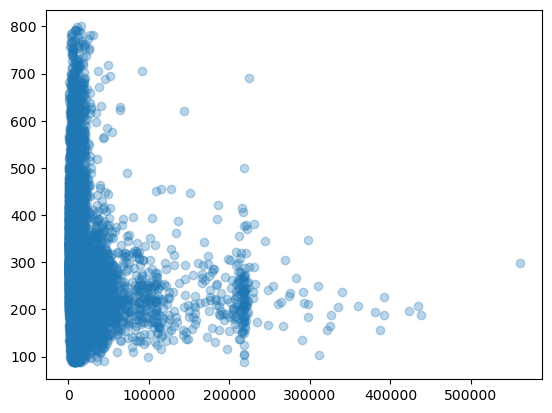

In [123]:
plt.figure()
plt.scatter(df_houseprice['sqft_lot15'], df_houseprice['price_by_sqft'], alpha=0.3)

In [124]:
corr_lot_15 = df_houseprice['sqft_lot15'].corr(df_houseprice['price_by_sqft'])
f'Correlation coefficient equals {corr_lot_15}'

'Correlation coefficient equals -0.06809799464971436'

In [125]:
df_houseprice = df_houseprice[df_houseprice['sqft_lot15'] <= 233500.0]

Text(0, 0.5, 'Count')

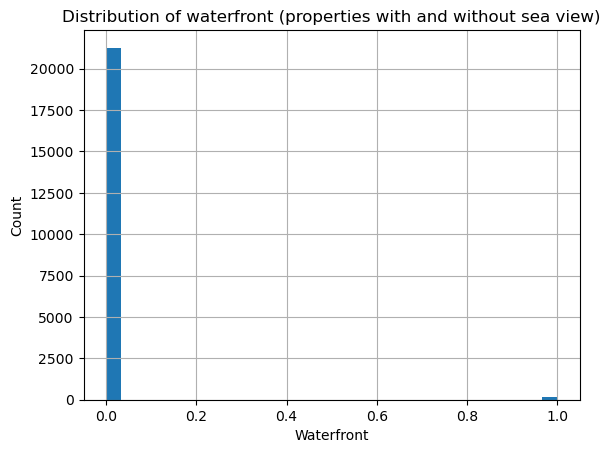

In [126]:
#Are houses with water views more expensive?
plt.figure()
df_houseprice['waterfront'].hist(bins=30)
plt.title('Distribution of waterfront (properties with and without sea view)')
plt.xlabel('Waterfront')
plt.ylabel('Count')

In [127]:
price_waterfront_stats = df_houseprice.groupby('waterfront')['price_by_sqft'].agg(['mean', 'median'])
price_waterfront_stats

,mean,median
waterfront,,
0,261.964347,243.750000
1,503.298529,505.555556


In [128]:
corr_waterfront = df_houseprice['waterfront'].corr(df_houseprice['price_by_sqft'])
corr_waterfront

0.18571163424033718

Text(0, 0.5, 'Count')

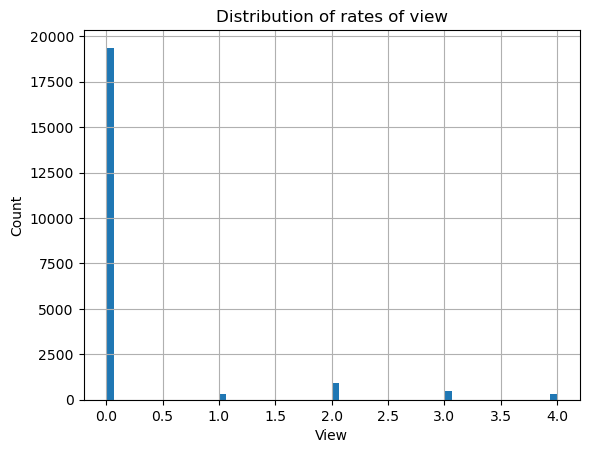

In [129]:
#How does the view rating correlate with the price?
plt.figure()
df_houseprice['view'].hist(bins=60)
plt.title('Distribution of rates of view')
plt.xlabel('View')
plt.ylabel('Count')

In [130]:
df_houseprice['view'].value_counts()

view
0    19366
2      938
3      487
1      330
4      302
Name: count, dtype: int64

In [131]:
price_by_view = df_houseprice.groupby('view')['price_by_sqft'].mean()

Text(0, 0.5, 'Price')

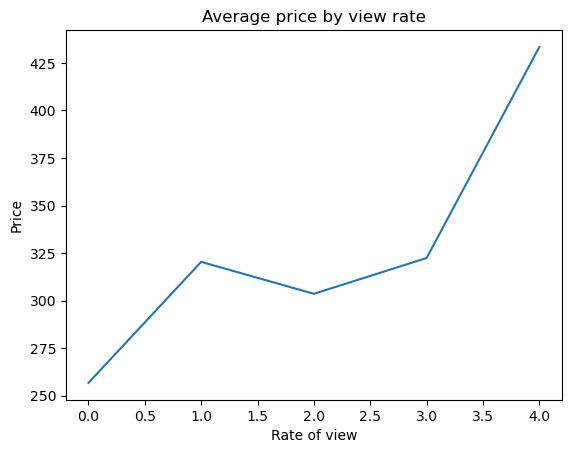

In [132]:
plt.figure()
price_by_view.plot(kind='line')
plt.title('Average price by view rate')
plt.xlabel('Rate of view')
plt.ylabel('Price')

In [133]:
price_view_stats = df_houseprice.groupby('view')['price_by_sqft'].agg(['mean', 'median',
                                                              'std', 'min', 'max'])
price_view_stats

,mean,median,std,min,max
view,,,,,
0,256.668320,239.160357,103.627031,87.588235,798.122066
1,320.350897,297.938893,125.595782,103.550296,727.091633
2,303.552891,285.590707,117.752664,89.204658,756.613757
3,322.384554,298.101266,133.240404,97.041420,758.354756
4,433.436970,405.031646,161.836185,134.408602,800.000000


Text(0, 0.5, 'Price')

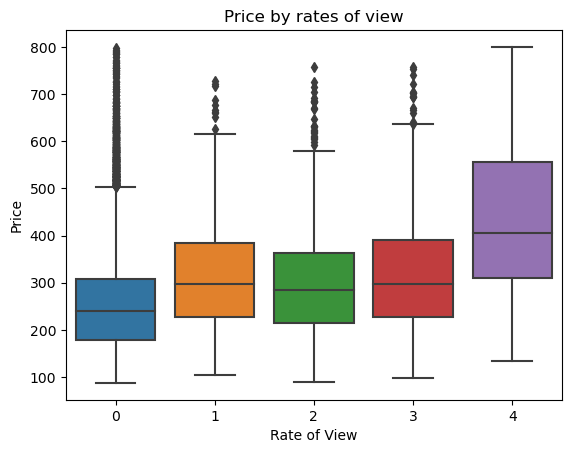

In [134]:
plt.figure()
sns.boxplot(x='view', y='price_by_sqft', data=df_houseprice)
plt.title('Price by rates of view')
plt.xlabel('Rate of View')
plt.ylabel('Price')

In [135]:
corr_view_rate = df_houseprice['view'].corr(df_houseprice['price_by_sqft'])
corr_view_rate

0.21733977837542995

Text(0, 0.5, 'Count')

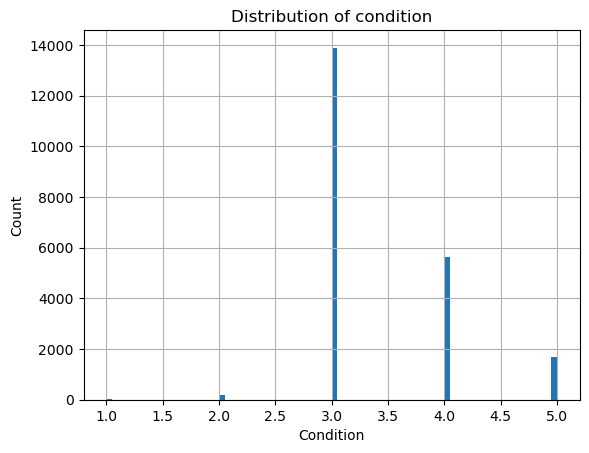

In [136]:
#Is the better condition of the house related to a higher price?
plt.figure()
df_houseprice['condition'].hist(bins=80)
plt.title('Distribution of condition')
plt.xlabel('Condition')
plt.ylabel('Count')

In [137]:
df_houseprice['condition'].value_counts()

condition
3    13889
4     5642
5     1694
2      169
1       29
Name: count, dtype: int64

Text(0, 0.5, 'Count')

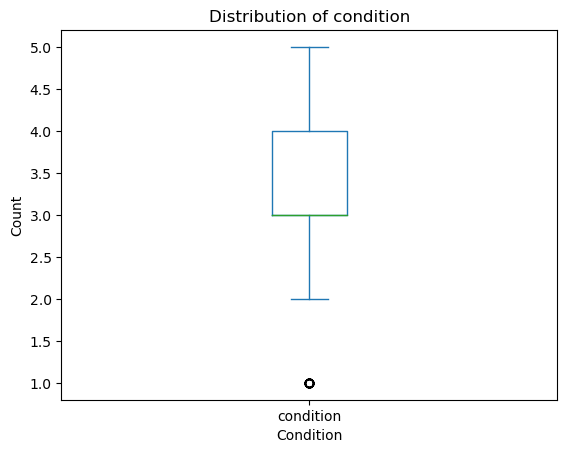

In [138]:
plt.figure()
df_houseprice['condition'].plot.box()
plt.title('Distribution of condition')
plt.xlabel('Condition')
plt.ylabel('Count')

Text(0, 0.5, 'Price')

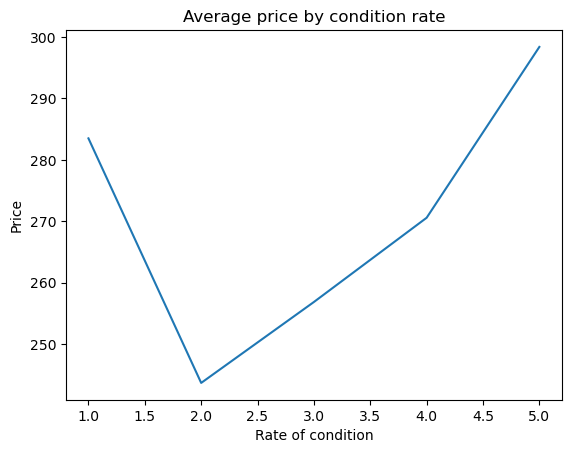

In [139]:
price_by_cond = df_houseprice.groupby('condition')['price_by_sqft'].mean()

plt.figure()
price_by_cond.plot(kind='line')
plt.title('Average price by condition rate')
plt.xlabel('Rate of condition')
plt.ylabel('Price')

In [140]:
price_cond_stats = df_houseprice.groupby('condition')['price_by_sqft'].agg(['mean', 'median',
                                                                    'std', 'min', 'max'])
price_cond_stats

,mean,median,std,min,max
condition,,,,,
1,283.489358,243.589744,175.640221,95.378151,785.340314
2,243.695040,210.384615,128.259063,88.785047,792.682927
3,256.864476,238.967136,104.724434,87.588235,800.000000
4,270.569504,250.000000,116.310652,88.083700,792.105263
5,298.368853,284.139472,112.027131,88.000000,758.354756


In [141]:
df_houseprice = df_houseprice[df_houseprice['condition'] > 1.0]

Text(0, 0.5, 'Price')

<Figure size 640x480 with 0 Axes>

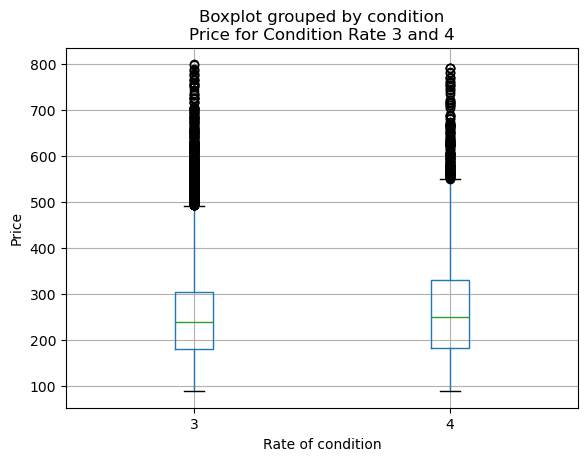

In [142]:
condition_3_and_4 = df_houseprice[df_houseprice['condition'].isin([3.0, 4.0])]

plt.figure()
condition_3_and_4.boxplot(column='price_by_sqft', by='condition')
plt.title('Price for Condition Rate 3 and 4')
plt.xlabel('Rate of condition')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

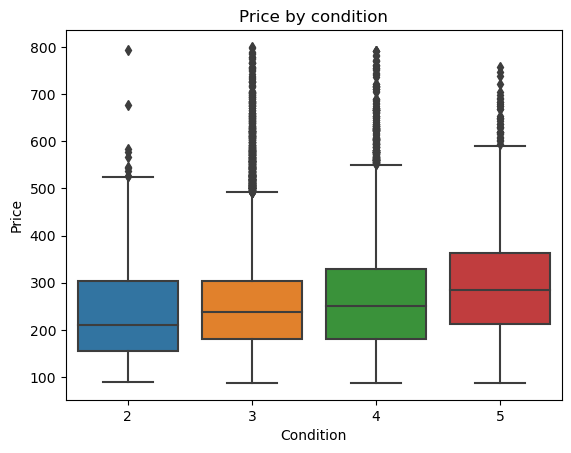

In [143]:
plt.figure()
sns.boxplot(x='condition', y='price_by_sqft', data=df_houseprice)
plt.title('Price by condition')
plt.xlabel('Condition')
plt.ylabel('Price')

In [144]:
corr_cond_rate = df_houseprice['condition'].corr(df_houseprice['price_by_sqft'])
corr_cond_rate

0.10593181421920281

Text(0, 0.5, 'Count')

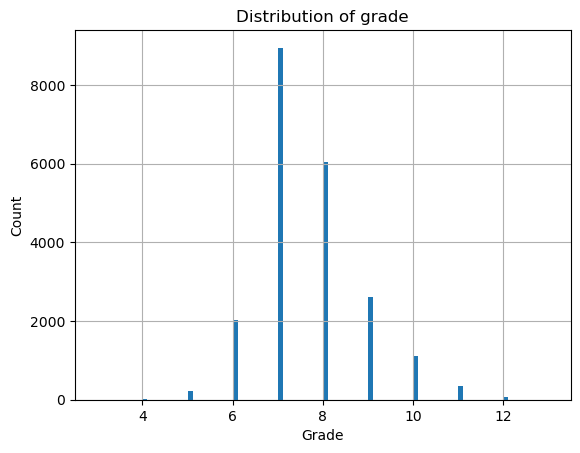

In [145]:
#Is the better grade of the house related to a higher selling price?
plt.figure()
df_houseprice['grade'].hist(bins=90)
plt.title('Distribution of grade')
plt.xlabel('Grade')
plt.ylabel('Count')

In [146]:
df_houseprice['grade'].value_counts()

grade
7     8942
8     6048
9     2603
6     2020
10    1110
11     351
5      229
12      59
4       28
13       3
3        1
Name: count, dtype: int64

Text(0, 0.5, 'Count')

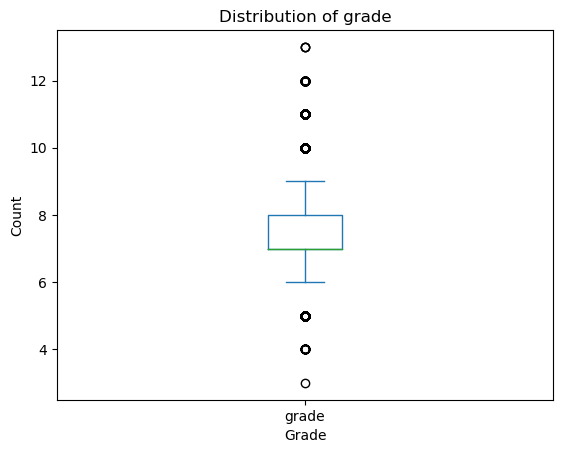

In [148]:
plt.figure()
df_houseprice['grade'].plot.box()
plt.title('Distribution of grade')
plt.xlabel('Grade')
plt.ylabel('Count')

Text(0, 0.5, 'Price')

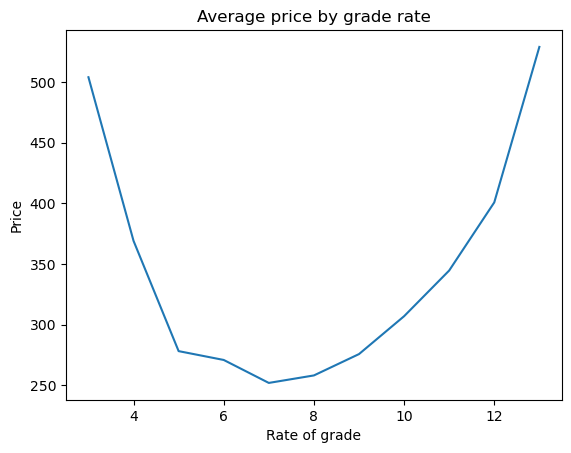

In [149]:
price_by_grade = df_houseprice.groupby('grade')['price_by_sqft'].mean()

plt.figure()
price_by_grade.plot(kind='line')
plt.title('Average price by grade rate')
plt.xlabel('Rate of grade')
plt.ylabel('Price')

In [150]:
price_grade_stats = df_houseprice.groupby('grade')['price_by_sqft'].agg(['mean', 'median',
                                                                    'std', 'min', 'max'])
price_grade_stats

,mean,median,std,min,max
grade,,,,,
3,503.846154,503.846154,NaN,503.846154,503.846154
4,369.020815,312.080628,200.443643,98.958333,792.682927
5,278.170873,223.252427,155.751807,89.285714,787.037037
6,270.895677,240.963855,121.299099,87.647059,792.105263
7,251.975200,228.528672,106.336604,87.588235,779.245283
8,258.144644,247.145573,97.718695,88.028169,781.170483
9,275.731322,254.863813,105.272031,87.713311,766.283525
10,306.930427,271.755451,121.940104,96.722622,776.892430
11,344.579574,297.872340,133.034390,124.458874,800.000000


Text(0, 0.5, 'Price')

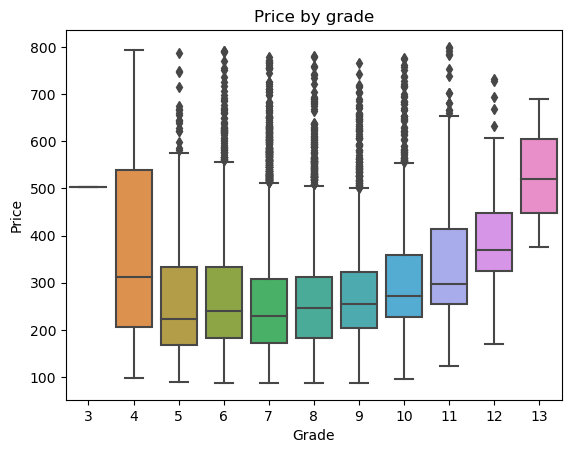

In [151]:
plt.figure()
sns.boxplot(x='grade', y='price_by_sqft', data=df_houseprice)
plt.title('Price by grade')
plt.xlabel('Grade')
plt.ylabel('Price')

In [152]:
corr_grade_rate = df_houseprice['grade'].corr(df_houseprice['price_by_sqft'])
corr_grade_rate

0.1125448532476765

In [153]:
df_houseprice = df_houseprice[(df_houseprice['grade'] <= 11.0) & (df_houseprice['grade'] > 4.0)]

In [154]:
#NEW COLUMNS
#number of all rooms
df_houseprice['number_of_rooms'] = df_houseprice['bedrooms'] + df_houseprice['bathrooms']
price_by_rooms = df_houseprice.groupby('number_of_rooms')['price_by_sqft'].mean()

<Axes: xlabel='number_of_rooms'>

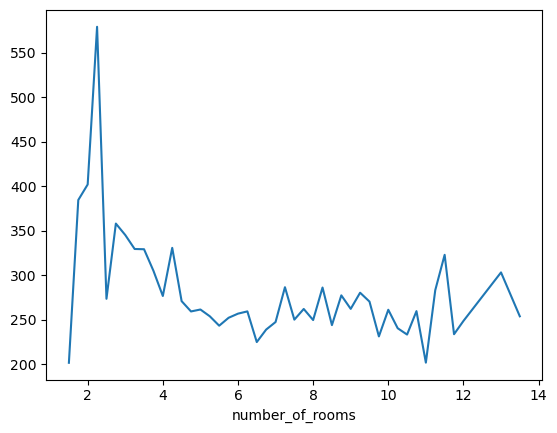

In [155]:
plt.figure()
price_by_rooms.plot(kind='line')

In [156]:
df_houseprice['number_of_rooms'].corr(df_houseprice['price_by_sqft'])

-0.20422004026027626

0.30032735308458763

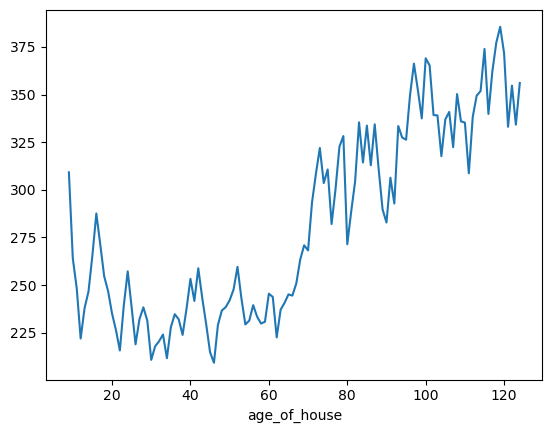

In [157]:
#age of house
current_year = datetime.now().year

df_houseprice['age_of_house'] = current_year - df_houseprice['yr_built']
price_by_age = df_houseprice.groupby('age_of_house')['price_by_sqft'].mean()

plt.figure()
price_by_age.plot(kind='line')
df_houseprice['age_of_house'].corr(df_houseprice['price_by_sqft'])

<Axes: xlabel='view_scale'>

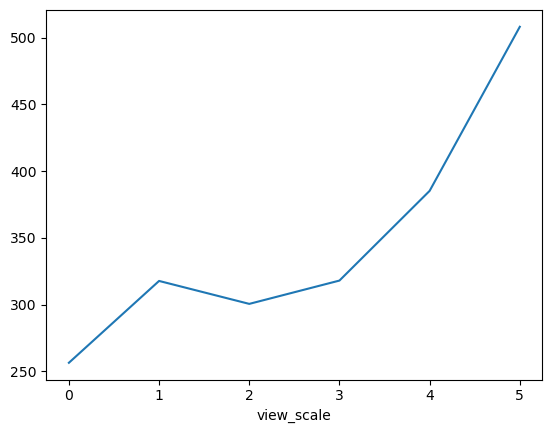

In [159]:
#scale of view
df_houseprice['view_scale'] = df_houseprice['waterfront'] + df_houseprice['view']
price_by_view_sc = df_houseprice.groupby('view_scale')['price_by_sqft'].mean()

plt.figure()
price_by_view_sc.plot(kind='line')

In [160]:
df_houseprice['view_scale'].corr(df_houseprice['price_by_sqft'])

0.22077742788117982

<Axes: xlabel='cond_scale'>

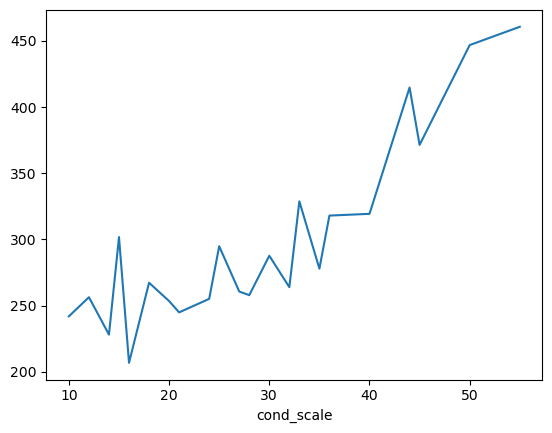

In [162]:
#condition scale
df_houseprice['cond_scale'] = df_houseprice['condition'] * df_houseprice['grade']
price_by_cond_sc = df_houseprice.groupby('cond_scale')['price_by_sqft'].mean()

plt.figure()
price_by_cond_sc.plot(kind='line')

In [163]:
df_houseprice['cond_scale'].corr(df_houseprice['price_by_sqft'])

0.17038782459097035

In [164]:
df_houseprice['dist_to_downtown_km'].corr(df_houseprice['price_by_sqft'])

-0.4844066409373917

In [165]:
df_houseprice = df_houseprice.drop(columns=['date', 'zipcode', 'lat', 'long',
                                            'yr_renovated', 'price', 'yr_built',
                                            'price_by_sqft', 'dist_to_downtown',
                                            'dist_to_bellevue', 'dist_to_northwest_seattle',
                                            'decade', 'dist_to_downtown_km_bins',
                                            'dist_to_bellevue_km_bins',
                                            'dist_to_northwest_seattle_km_bins'])

In [166]:
correlation = df_houseprice.corr()
correlation

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,dist_to_downtown_km,dist_to_bellevue_km,dist_to_northwest_seattle_km,price_by_sqft_log,number_of_rooms,age_of_house,view_scale,cond_scale
bedrooms,1.000000,0.512971,0.595077,0.041308,0.171982,-0.015214,0.070078,0.022865,0.351146,0.485448,0.299388,0.399186,0.036051,0.082374,-0.087531,0.105623,-0.228180,0.895216,-0.154925,0.065262,0.255003
bathrooms,0.512971,1.000000,0.736271,0.077264,0.507701,0.045744,0.162549,-0.132638,0.648782,0.661871,0.259973,0.557459,0.071448,0.140393,-0.062663,0.139571,-0.107403,0.841753,-0.516300,0.159896,0.315144
sqft_living,0.595077,0.736271,1.000000,0.183456,0.351865,0.079105,0.257101,-0.059409,0.746678,0.862845,0.418003,0.755622,0.180257,0.134190,-0.102272,0.138038,-0.135956,0.756479,-0.320560,0.253615,0.444217
sqft_lot,0.041308,0.077264,0.183456,1.000000,-0.021838,0.022644,0.066597,-0.005736,0.118164,0.191442,0.017275,0.175970,0.793083,0.297003,0.206988,0.271683,-0.051113,0.066090,-0.059077,0.065920,0.073426
floors,0.171982,0.507701,0.351865,-0.021838,1.000000,0.021963,0.021166,-0.270708,0.459983,0.530992,-0.261766,0.274192,-0.028359,0.049788,-0.008664,0.036657,0.015329,0.371729,-0.490059,0.022503,0.066574
waterfront,-0.015214,0.045744,0.079105,0.022644,0.021963,1.000000,0.392105,0.019308,0.063576,0.053121,0.060430,0.075804,0.038579,-0.015886,0.006282,-0.017817,0.138312,0.014179,0.031301,0.479214,0.060444
view,0.070078,0.162549,0.257101,0.066597,0.021166,0.392105,1.000000,0.051486,0.227405,0.137383,0.259631,0.261272,0.058614,-0.077982,-0.020432,-0.085677,0.188804,0.128458,0.064518,0.995315,0.203635
condition,0.022865,-0.132638,-0.059409,-0.005736,-0.270708,0.019308,0.051486,1.000000,-0.156604,-0.165386,0.180074,-0.092042,0.001537,-0.083400,-0.063972,-0.078481,0.108144,-0.054477,0.371333,0.051153,0.747167
grade,0.351146,0.648782,0.746678,0.118164,0.459983,0.063576,0.227405,-0.156604,1.000000,0.739313,0.141171,0.703618,0.116945,0.065446,-0.147147,0.055514,0.124240,0.557648,-0.449999,0.223649,0.528490
sqft_above,0.485448,0.661871,0.862845,0.191442,0.530992,0.053121,0.137383,-0.165386,0.739313,1.000000,-0.097867,0.726831,0.190201,0.259632,-0.020409,0.260667,-0.124542,0.648907,-0.431848,0.136661,0.341267


Text(0.5, 1.0, 'Correlation Matrix')

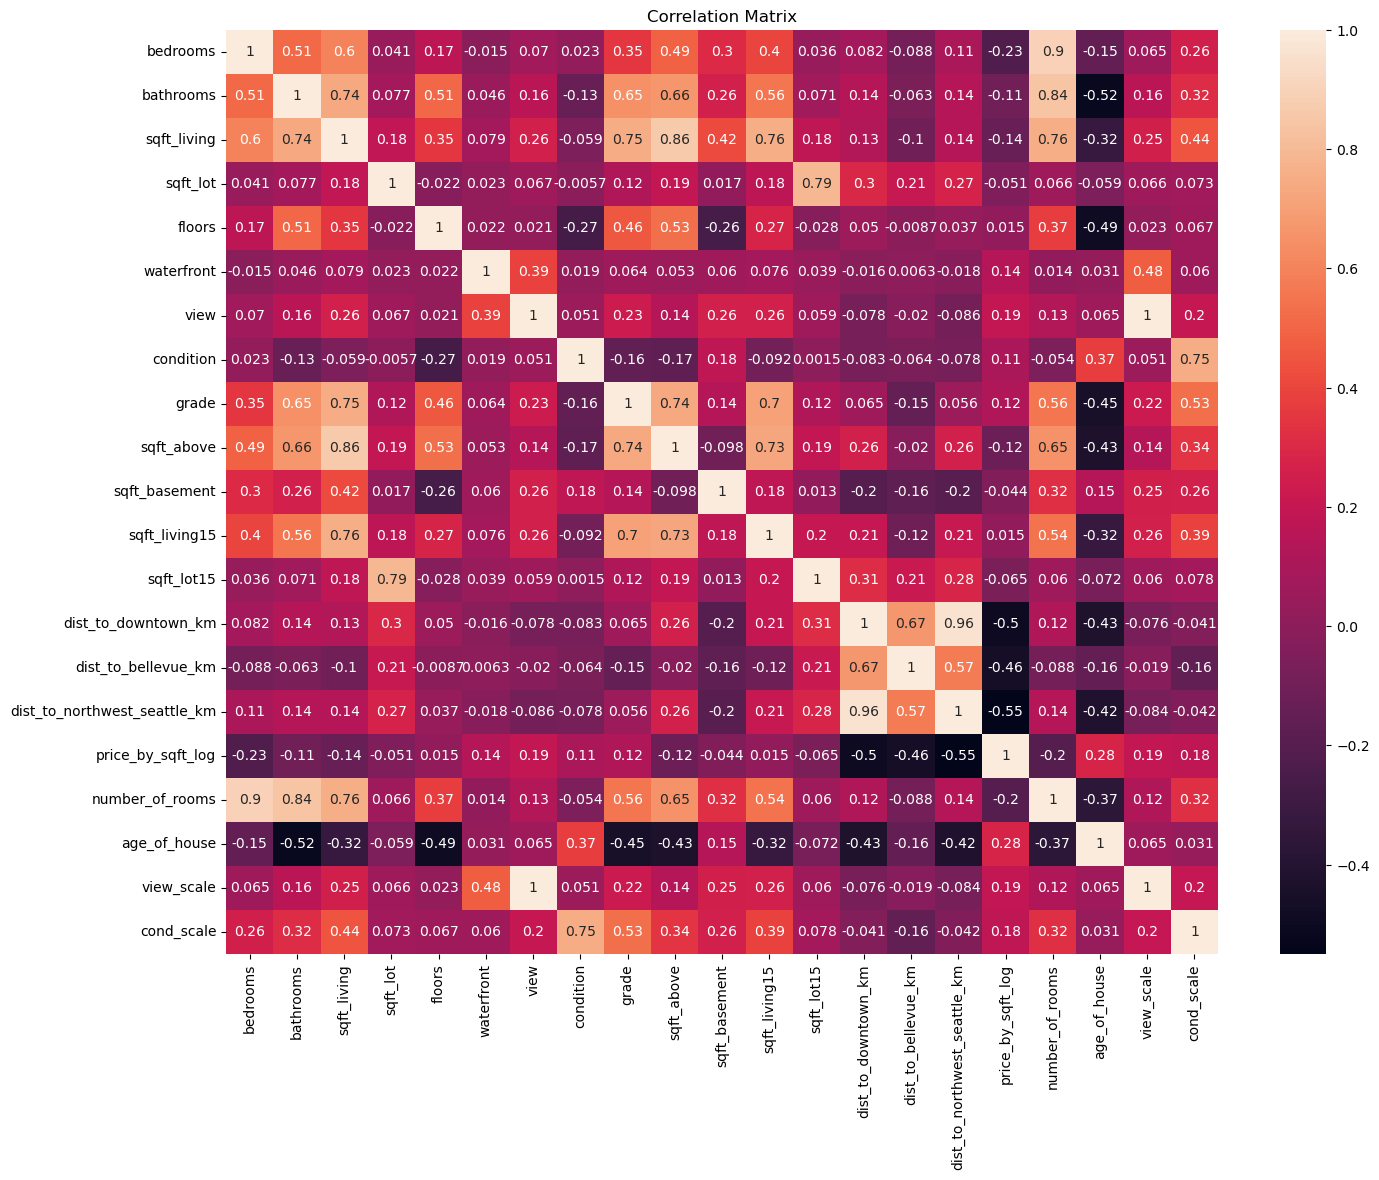

In [173]:
plt.figure(figsize=(16, 12))
sns.heatmap(correlation, annot=True)
plt.title('Correlation Matrix')

In [174]:
df_houseprice = df_houseprice.drop(columns=['sqft_above', 'dist_to_downtown_km',
                                            'number_of_rooms', 'view_scale'])

In [175]:
df_houseprice = df_houseprice.drop(columns='bedrooms')